# Supervised classification problem  :  Boosting Techniques
## Predict the quality of the wine

## Steps

### 1. Data Injection
    - 1.1 Data Profiling and Basic Operations
    - 1.2 Data Cleaning
	- 1.3 Statistical Analysis
### 2. EDA
    - 2.1 Bivariate Analysis
    - 2.2 Multivariate Analysis
### 3. Pre-processing
    - 3.1 Handling null values
    - 3.2 Feature Selection
	- 3.3 Saving data to mangoDB
    - 3.4 Train-Test split
### 4. Model Building
    - 4.1 Decision Tree Regressor (Plotting Tree)
    - 4.2 HyperParameter Tuning : Decision Tree Regressor (HalvingGridSearchCV)
    - 4.3 Random Forest Regressor
    - 4.4 Hyperparameter tuning : Random Forest Regressor (HalvingGridSearchCV)
    - 4.5 Bagging Regressor
    - 4.6 Hyperparameter tuning : Bagging Regressor  (HalvingGridSearchCV)
    - 4.7 Extra Trees Regressor
    - 4.8 HyperParameter Tuning : Extra Trees Regressor  (HalvingGridSearchCV)
    - 4.9 Voting Regressor
### 5. Evaluation
    - 5.1 R2 score
    - 5.2 Adjusted R2

In [3]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


%matplotlib inline
warnings.filterwarnings('ignore')

#### Feature Information:

1 - fixed acidity  (most acids involved with wine or fixed or nonvolatile (do not evaporate readily))

2 - volatile acidity  (the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste)

3 - citric acid  (found in small quantities, citric acid can add 'freshness' and flavor to wines)

4 - residual sugar  (the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 
                    gram/liter and wines with greater than 45 grams/liter are considered sweet)
                    
5 - chlorides  (the amount of salt in the wine)

6 - free sulfur dioxide  (the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) 
                    and bisulfite ion; it prevents microbial growth and the oxidation of wine)
                    
7 - total sulfur dioxide  (amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, 
                    but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine)
                    
8 - density  (the density of water is close to that of water depending on the percent alcohol and sugar content)

9 - pH  (describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 
                    3-4 on the pH scale)
                    
10 - sulphates  (a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial 
                    and antioxidant)
                    
11 - alcohol

Output variable (based on sensory data):
12 - quality (score between 0 and 10)

#### Storing the path of the data

In [4]:
wine_data = "https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv"

## 1. Data injection
###  1.1 Data Profiling and Basic Operations

In [5]:
data = pd.read_csv(wine_data)

#### top 5 records

In [6]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Random 5 records

In [7]:
data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
131,5.6,0.50,0.09,2.3,0.049,17.0,99.0,0.99370,3.63,0.63,13.0,5
78,6.7,0.75,0.12,2.0,0.086,12.0,80.0,0.99580,3.38,0.52,10.1,5
361,8.6,0.45,0.31,2.6,0.086,21.0,50.0,0.99820,3.37,0.91,9.9,6
752,7.6,0.54,0.13,2.5,0.097,24.0,66.0,0.99785,3.39,0.61,9.4,5
543,11.2,0.66,0.24,2.5,0.085,16.0,53.0,0.99930,3.06,0.72,11.0,6


In [8]:
data.quality.unique()

array([5, 6, 7, 4, 8, 3])

#### Observation :
- Dataset has 6 types of output from 3 to 6.

##### To get number of unique values in each feature

In [9]:
data.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [10]:
data['quality'].nunique()

6

#### Observation :
- There are 6 classes in output feature

In [11]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

#### Observation :
- As output type is of more than two types for Logistic Regression -->> Multinomial 

#### Columns of the dataset

In [12]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

#### Basic Information of Dataset

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### Observation :
- There is no null value  -->> Good Dataset
- All the input features are of 'Float' type and output label is of 'int' type

##### Checking the duplicate values

In [14]:
data.duplicated().sum()

240

#### Observation :
- There are 240 duplicate records are there in the dataset

In [15]:
data = data.drop_duplicates()

In [16]:
data.duplicated().sum()

0

#### Observation :
- All duplicate records got deleted

### 1.2 Statistical Analysis

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


Observation :
- 'total sulfur dioxide' column has outliers
- 'free sulfur dioxide' column has outliers
- 'residual sugar' column has outliers

This shows features are not in same scale, we need to standardize them

#### Categorizing numerical and categorical features

In [18]:
data_num = [feature for feature in data.columns if data[feature].dtypes!='O']
data_cat = [feature for feature in data.columns if data[feature].dtypes=='O']
print(f'We have {len(data_num)} numerical features')
print(f'We have {len(data_cat)} categorical features')

We have 12 numerical features
We have 0 categorical features


## 2. EDA

### 2.1 Univariate analysis

#### Distplot : To check the distribution of every feature

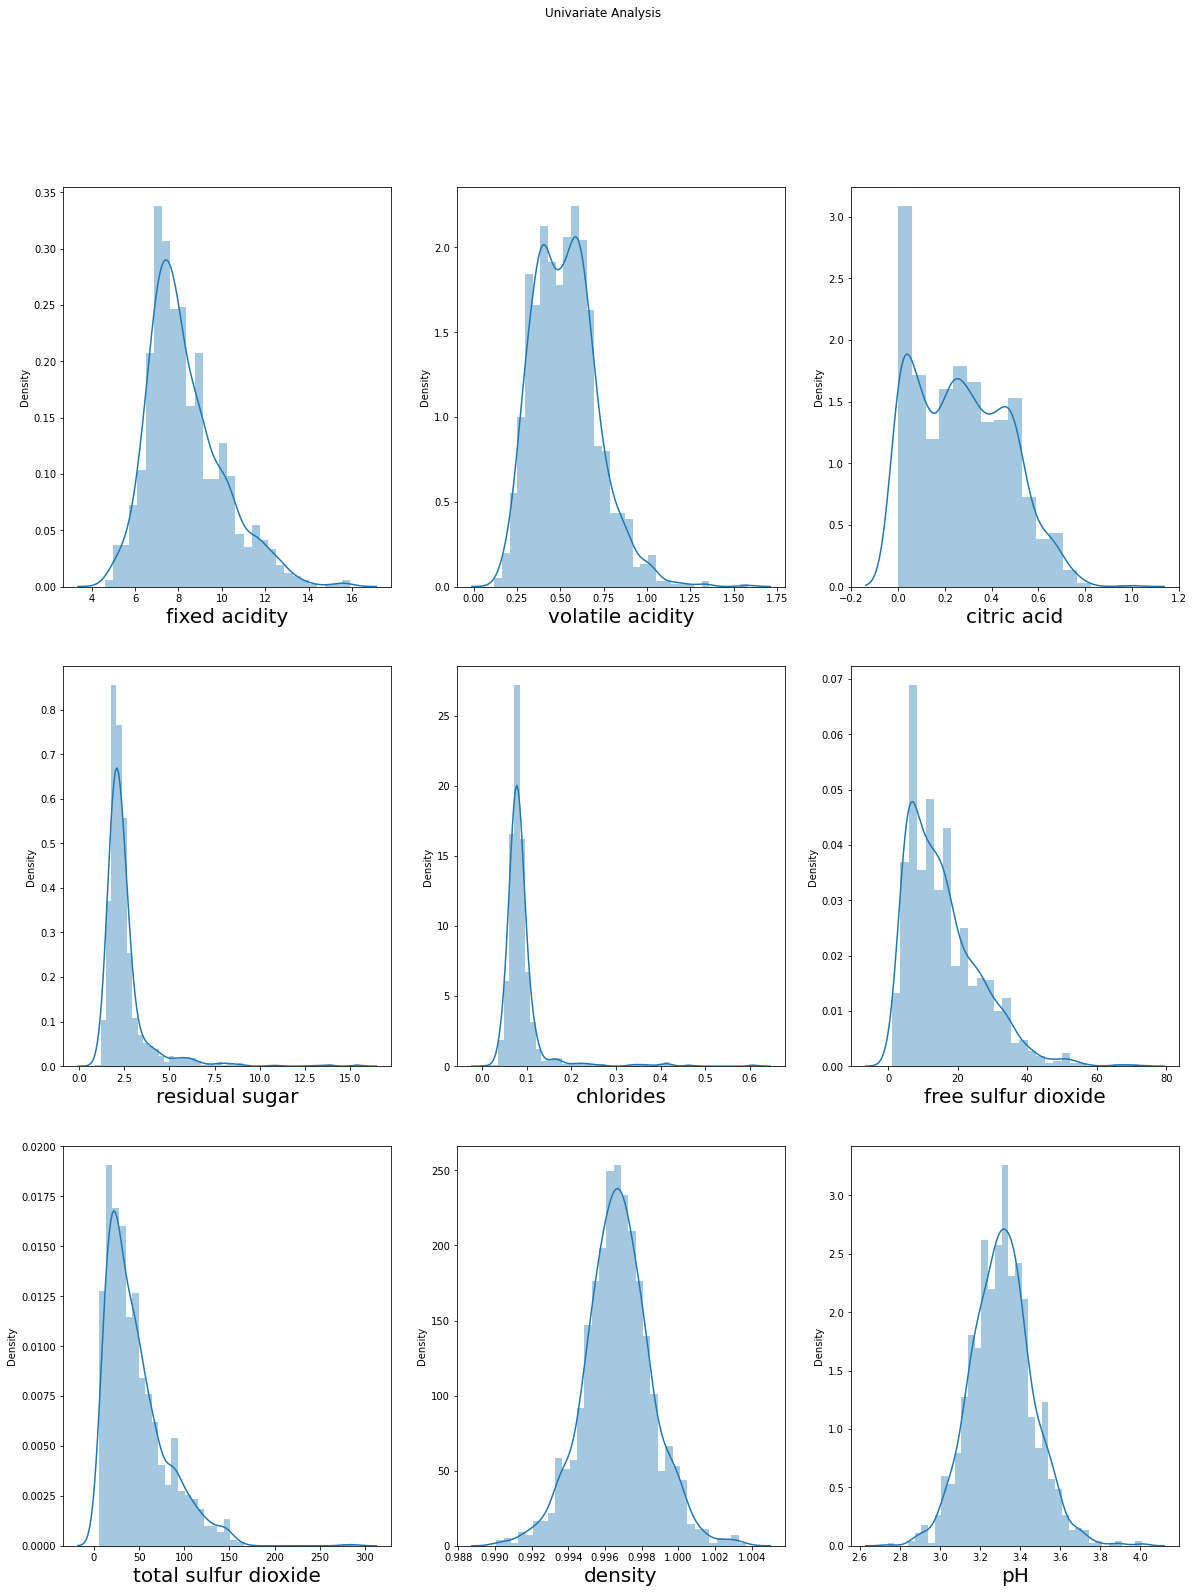

In [19]:
plt.figure(figsize=(20,25), facecolor='white')
plt.suptitle('Univariate Analysis')

plotnumber = 1
for columns in data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[columns])
        plt.xlabel(columns, fontsize=20)
    plotnumber+=1
plt.show()

Observation :
- "fixed acidity", "density" and "pH" are approx normally distributed
- "residual sugar", "chlorides", "total sulfur dioxide" and "free sulfur dioxide" are positively skewed

#### Count plot

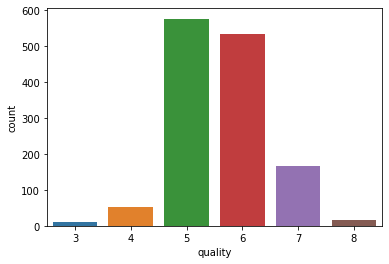

In [20]:
sns.countplot(x=data['quality'])

Observation :
- There is a highly imbalanced data.

### 2.2 Multivariate Analysis

### To check the correlation

In [21]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


### heatmap

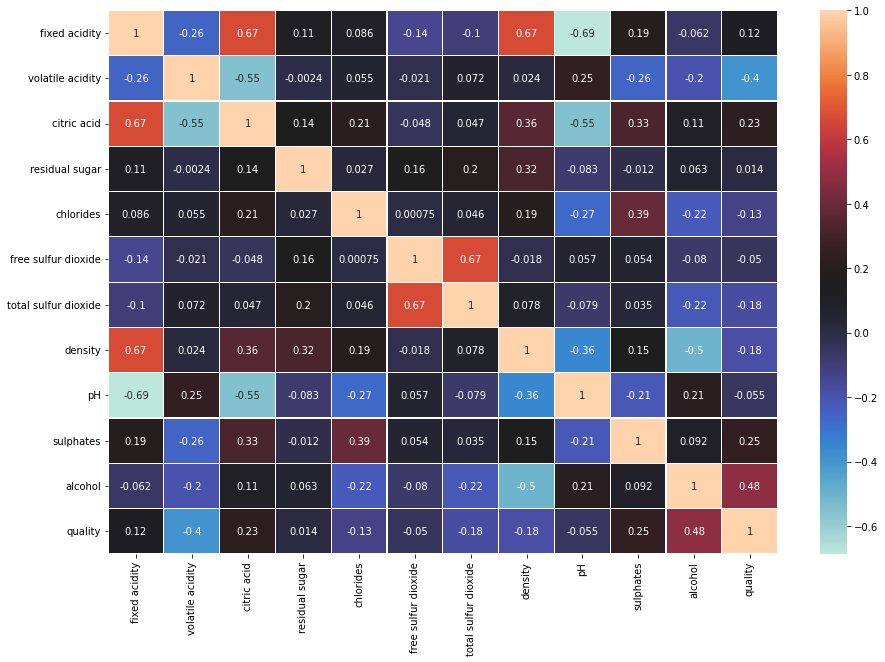

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, cmap='icefire', linewidths=0.2)

Observation :
- Residual Sugar, Chlorides, Total sulfer dioxide, free sulfer dioxide are right skewed.
- Density, Ph,  are approx normally distributed

# 3. Pre-processing

### Segragating the input (independent) features and output(Dependent) label

In [23]:
# Considering the input features 

#X = data.drop('quality', axis=1)
X = data.iloc[:,:-1]
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [24]:
# Output label

y = data['quality']

### 3.1 Train test split 

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
55,7.7,0.620,0.04,3.8,0.084,25.0,45.0,0.99780,3.34,0.53,9.5
1291,8.2,0.635,0.10,2.1,0.073,25.0,60.0,0.99638,3.29,0.75,10.9
1544,8.4,0.370,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.2
593,9.9,0.490,0.58,3.5,0.094,9.0,43.0,1.00040,3.29,0.58,9.0
1261,6.3,1.020,0.00,2.0,0.083,17.0,24.0,0.99437,3.59,0.55,11.2
...,...,...,...,...,...,...,...,...,...,...,...
529,9.9,0.630,0.24,2.4,0.077,6.0,33.0,0.99740,3.09,0.57,9.4
468,11.4,0.360,0.69,2.1,0.090,6.0,21.0,1.00000,3.17,0.62,9.2
371,7.9,0.240,0.40,1.6,0.056,11.0,25.0,0.99670,3.32,0.87,8.7
699,11.8,0.380,0.55,2.1,0.071,5.0,19.0,0.99860,3.11,0.62,10.8


#### Checking the shape

In [27]:
X_train.shape  ,  X_test.shape

((910, 11), (449, 11))

In [28]:
y_train.shape, y_test.shape

((910,), (449,))

# 4. Model Building

## 4.1 AdaBoost Classifier

In [29]:
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier()

In [30]:
# Model training

ab.fit(X_train, y_train)

AdaBoostClassifier()

#### Saving the model to a file

In [31]:
import pickle 

with open("WineQualityAB.pkl", 'wb') as f:
    pickle.dump(ab, f)

#### Importing pickle file for prediction

In [32]:
ab_cls = pickle.load(open('WineQualityAB.pkl', 'rb'))

In [33]:
# Predicting value
y_pred_ab = ab.predict(X_test)

#### 5.1 Accuracy Score

In [80]:
# Bagging Classifier Model's accuracy score
from sklearn.metrics import accuracy_score


print("AdaBoost Classifier training accuracy score is : {}%".format(round(ab_cls.score(X_train, y_train)*100, 2)))
print("AdaBoost Classifier model's accuracy score is : {}%".format(round(accuracy_score(y_test, y_pred_ab)*100, 2)))

AdaBoost Classifier training accuracy score is : 55.38%
AdaBoost Classifier model's accuracy score is : 53.67%


#### Observation :
- This is an generalized model

#### 5.2 Confusion_matrix

In [35]:
from sklearn.metrics import confusion_matrix

conf_mat_ab = confusion_matrix(y_test, y_pred_ab)
conf_mat_ab

array([[  0,   0,   1,   4,   0,   0],
       [  0,   0,   4,  10,   0,   1],
       [  0,   0, 126,  64,   0,   2],
       [  0,   0,  63, 115,   0,   3],
       [  0,   0,   2,  50,   0,   0],
       [  0,   0,   0,   4,   0,   0]])

#### 5.3 Classification Report

In [36]:
from sklearn.metrics import classification_report

class_reprt_ab = classification_report(y_test, y_pred_ab)
print(class_reprt_ab)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        15
           5       0.64      0.66      0.65       192
           6       0.47      0.64      0.54       181
           7       0.00      0.00      0.00        52
           8       0.00      0.00      0.00         4

    accuracy                           0.54       449
   macro avg       0.18      0.22      0.20       449
weighted avg       0.46      0.54      0.49       449



## 4.2 Grid Search CV : Hyperparameter tuning
###  AdaBoosting Classifier
#### What is GridSearchCV 
A Machine Learning model is defined as a mathematical model with a
number of parameters that need to be learned from the data. However,
there are some parameters, known as Hyperparameters and those cannot
be directly learned. They are commonly chosen by humans based on some
intuition or hit and trial before the actual training begins. These
parameters exhibit their importance by improving the performance of the
model such as its complexity or its learning rate. Models can have many
hyper-parameters and finding the best combination of parameters can be
treated as a search problem.

SVM also has some hyper-parameters (like what C or gamma values to
use) and finding optimal hyper-parameter is a very hard task to solve. But
it can be found by just trying all combinations and see what parameters
work best. The main idea behind it is to create a grid of hyper-parameters
and just try all of their combinations.

GridSearchCV takes a dictionary that describes the parameters that could
be tried on a model to train it. The grid of parameters is defined as a
dictionary, where the keys are the parameters and the values are the
settings to be tested.

In [37]:
from sklearn.model_selection import GridSearchCV

# Defining parameters for hyper parameters

grid_params = {'n_estimators' : [5, 10, 15],
        'learning_rate' : [0.001,0.01,0.1,1.0],
        'algorithm' : ['SAMME', 'SAMME.R']               
        }

In [38]:
grid_search = GridSearchCV(estimator=ab_cls, param_grid=grid_params, verbose=2, n_jobs=-1, cv=3)

In [39]:
# Hyper parameter tuning

grid_search_ab = grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [40]:
# Finding the best parameters

grid_search_ab.best_params_

{'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 15}

In [41]:
model_with_best_params_ab = AdaBoostClassifier(algorithm = 'SAMME', learning_rate = 0.1, n_estimators = 15, random_state = 18)

In [42]:
model_with_best_params_ab.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, n_estimators=15,
                   random_state=18)

In [43]:
y_pred_bst_est_ab = model_with_best_params_ab.predict(X_test)

#### 5.1 Accuracy Score

In [44]:
# Bagging Classifier Model's accuracy score after hyper parameter tuning

print("AdaBoost Classifier with best parameter training accuracy score is : {}%".format(round(model_with_best_params_ab.score(X_train, y_train)*100, 2)))
print("AdaBoost Classifier with best parameter model's accuracy score is : {}%".format(round(accuracy_score(y_test, y_pred_bst_est_ab)*100, 2)))

AdaBoost Classifier with best parameter training accuracy score is : 55.6%
AdaBoost Classifier with best parameter model's accuracy score is : 58.35%


#### 5.2 Confusion_matrix

In [45]:
conf_mat_ab_bst_prm = confusion_matrix(y_test, y_pred_bst_est_ab)
conf_mat_ab_bst_prm

array([[  0,   0,   3,   2,   0,   0],
       [  0,   0,   8,   7,   0,   0],
       [  0,   0, 152,  40,   0,   0],
       [  0,   0,  71, 110,   0,   0],
       [  0,   0,   2,  50,   0,   0],
       [  0,   0,   0,   4,   0,   0]])

#### 5.3 Classification Report

In [46]:
class_reprt_ab_bst_prm = classification_report(y_test, y_pred_bst_est_ab)
print(class_reprt_ab_bst_prm)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        15
           5       0.64      0.79      0.71       192
           6       0.52      0.61      0.56       181
           7       0.00      0.00      0.00        52
           8       0.00      0.00      0.00         4

    accuracy                           0.58       449
   macro avg       0.19      0.23      0.21       449
weighted avg       0.48      0.58      0.53       449



# 4.3 GradientBoostingClassifier

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

In [48]:
## Model Tarining

gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [49]:
# Predicting values

y_pred_gbc = gbc.predict(X_test)

#### 5.1 Accuracy Score

In [50]:
# Gradient Boost Classifier Model's accuracy score

print("Gradient Boost Classifier training accuracy score is : {}%".format(round(gbc.score(X_train, y_train)*100, 2)))
print("Gradient Boost Classifier model's accuracy score is : {}%".format(round(accuracy_score(y_test, y_pred_gbc)*100, 2)))

Gradient Boost Classifier training accuracy score is : 90.55%
Gradient Boost Classifier model's accuracy score is : 59.47%


#### Observation :
- This is an over-fitted model

#### 5.2 Confusion_matrix

In [51]:
conf_mat_gbc = confusion_matrix(y_test, y_pred_gbc)
conf_mat_gbc

array([[  0,   2,   3,   0,   0,   0],
       [  0,   1,   8,   5,   1,   0],
       [  2,   3, 131,  55,   1,   0],
       [  1,   5,  43, 113,  18,   1],
       [  0,   0,   5,  22,  22,   3],
       [  0,   0,   0,   3,   1,   0]])

#### 5.3 Classification Report

In [52]:
class_reprt_gbc = classification_report(y_test, y_pred_gbc)
print(class_reprt_gbc)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.09      0.07      0.08        15
           5       0.69      0.68      0.69       192
           6       0.57      0.62      0.60       181
           7       0.51      0.42      0.46        52
           8       0.00      0.00      0.00         4

    accuracy                           0.59       449
   macro avg       0.31      0.30      0.30       449
weighted avg       0.59      0.59      0.59       449



# 4.4 GridSearch CV : HyperParameter Tuning 
## GradientBoostingClassifier

In [53]:
grid_param = {
    "learning_rate":[0.01,0.001,0.1],
    "n_estimators" : [10,20,30],
    'max_depth' : range(2,10,1),
    'min_samples_leaf' : range(1,5,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [54]:
grid_searh = GridSearchCV(estimator=gbc, param_grid=grid_param, cv=3, verbose=2, n_jobs=-1)

In [ ]:
#grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 4608 candidates, totalling 13824 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.001, 0.1],
                         'max_depth': range(2, 10),
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 10),
                         'n_estimators': [10, 20, 30]},
             verbose=2)

In [ ]:
# Finding the best parameters

#grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'n_estimators': 30}

In [55]:
model_with_best_params_gbc = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 3, max_features = 'auto', min_samples_leaf = 4, min_samples_split = 6, n_estimators = 30)

In [56]:
model_with_best_params_gbc.fit(X_train, y_train)

GradientBoostingClassifier(max_features='auto', min_samples_leaf=4,
                           min_samples_split=6, n_estimators=30)

In [57]:
y_pred_bst_param_gbc = model_with_best_params_gbc.predict(X_test)

#### 5.1 Accuracy Score

In [58]:
# GradientBoostingClassifier Model's accuracy score after hyper parameter tuning

print("GradientBoostingClassifier with best parameter training accuracy score is : {}%".format(round(model_with_best_params_gbc.score(X_train, y_train)*100, 2)))
print("GradientBoostingClassifier with best parameter model's accuracy score is : {}%".format(round(accuracy_score(y_test, y_pred_bst_param_gbc)*100, 2)))

GradientBoostingClassifier with best parameter training accuracy score is : 76.04%
GradientBoostingClassifier with best parameter model's accuracy score is : 61.47%


#### 5.2 Confusion_matrix

In [59]:
conf_mat_gbc_bst_prm = confusion_matrix(y_test, y_pred_bst_param_gbc)
conf_mat_gbc_bst_prm

array([[  0,   1,   4,   0,   0,   0],
       [  0,   1,   6,   7,   1,   0],
       [  1,   3, 139,  47,   2,   0],
       [  1,   1,  44, 117,  16,   2],
       [  0,   0,   3,  29,  19,   1],
       [  0,   0,   0,   3,   1,   0]])

#### 5.3 Classification Report

In [60]:
class_reprt_gbc_bst_prm = classification_report(y_test, y_pred_bst_param_gbc  )
print(class_reprt_gbc_bst_prm)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.17      0.07      0.10        15
           5       0.71      0.72      0.72       192
           6       0.58      0.65      0.61       181
           7       0.49      0.37      0.42        52
           8       0.00      0.00      0.00         4

    accuracy                           0.61       449
   macro avg       0.32      0.30      0.31       449
weighted avg       0.60      0.61      0.60       449



# 4.5 xgboostClassifier 

In [61]:
import xgboost

xgb = xgboost.XGBClassifier()

In [62]:
# Model Training

xgb.fit(X_train,y_train)

XGBClassifier(objective='multi:softprob')

In [63]:
y_pred_xgb = xgb.predict(X_test)

In [64]:
# xgboost Classifier Model's accuracy score after hyper parameter tuning

print("xgboost Classifier with best parameter training accuracy score is : {}%".format(round(xgb.score(X_train, y_train)*100, 2)))
print("xgboost Classifier with best parameter model's accuracy score is : {}%".format(round(accuracy_score(y_test, y_pred_xgb)*100, 2)))

xgboost Classifier with best parameter training accuracy score is : 81.98%
xgboost Classifier with best parameter model's accuracy score is : 63.47%


In [67]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 14.8 MB/s 
     |████████████████████████████████| 209 kB 26.9 MB/s 
     |████████████████████████████████| 81 kB 11.0 MB/s 
     |████████████████████████████████| 78 kB 8.3 MB/s 
     |████████████████████████████████| 112 kB 35.0 MB/s 
     |████████████████████████████████| 50 kB 8.1 MB/s 
     |████████████████████████████████| 147 kB 35.5 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=43abba8f7e59d8febaa163ee24ffe5ba57a2d31aa3c58e6f4a29160ac735b438
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [68]:
import optuna

In [69]:
def objective_classification(trial,data=X,target=y) :
    train_x , test_x , train_y , test_y= train_test_split(data , target , test_size = .20 ,random_state=10)
    
    param  = {
        'tree_method' :'gpu_hist',
        'verbosity' : 3,
        'objective' : "binary:logistics" , 
        'booster' : trial.suggest_categorical('booster' , ['dart' , 'gbtree','gblinear']),
        'lambda' : trial.suggest_float('lambda' , 1e-4 , 1),
        'alpha' :trial.suggest_float('alpha' , 1e-4 , 1),
        'subsample' : trial.suggest_float('subsample' , .1,.5),
        'colsample_bytree' : trial.suggest_float('colsample_bytree' , .1 ,.5)
        
    }
   
    if param['booster'] in ['gbtree' , 'dart']:
        param['gamma'] :trial.suggest_float('gamma' , 1e-3 , 4 )
        param['eta'] : trial.suggest_float('eta' , .001 ,5 )
        
    xgb_classification = xgboost.XGBClassifier(**param)
    xgb_classification.fit(train_x , train_y,eval_set  = [(test_x, test_y)])
    pred = xgb_classification.predict(test_x)
    accuracy  = xgb_classification.score(test_x , test_y)

    
    
    return accuracy

In [70]:
xgb_classification_oputuna = optuna.create_study()

[I 2022-11-24 04:37:11,962] A new study created in memory with name: no-name-601e8a04-579c-4066-9f95-c7484bd84e0d


In [71]:
xgb_classification_oputuna.optimize(objective_classification , n_trials = 100 )

[0]	validation_0-merror:0.544118
[1]	validation_0-merror:0.488971
[2]	validation_0-merror:0.470588
[3]	validation_0-merror:0.470588
[4]	validation_0-merror:0.459559
[5]	validation_0-merror:0.433824
[6]	validation_0-merror:0.4375
[7]	validation_0-merror:0.448529
[8]	validation_0-merror:0.455882
[9]	validation_0-merror:0.441176
[10]	validation_0-merror:0.444853
[11]	validation_0-merror:0.426471
[12]	validation_0-merror:0.419118
[13]	validation_0-merror:0.4375
[14]	validation_0-merror:0.441176
[15]	validation_0-merror:0.433824
[16]	validation_0-merror:0.452206
[17]	validation_0-merror:0.452206
[18]	validation_0-merror:0.433824
[19]	validation_0-merror:0.433824
[20]	validation_0-merror:0.4375
[21]	validation_0-merror:0.452206
[22]	validation_0-merror:0.452206
[23]	validation_0-merror:0.448529
[24]	validation_0-merror:0.463235
[25]	validation_0-merror:0.444853
[26]	validation_0-merror:0.441176
[27]	validation_0-merror:0.448529
[28]	validation_0-merror:0.455882
[29]	validation_0-merror:0.463

[I 2022-11-24 04:37:18,554] Trial 0 finished with value: 0.5698529411764706 and parameters: {'booster': 'gbtree', 'lambda': 0.7912435141342375, 'alpha': 0.5856354371913284, 'subsample': 0.26567106959140796, 'colsample_bytree': 0.28705033064100466}. Best is trial 0 with value: 0.5698529411764706.


[04:37:18] GetGradient: 0.00762875s, 100 calls @ 76us
[04:37:18] PredictRaw: 0.00317946s, 100 calls @ 31us
[04:37:18] UpdateOneIter: 2.49336s, 100 calls @ 24933us
[04:37:18] ======== Monitor: GBTree ========
[04:37:18] BoostNewTrees: 2.47035s, 100 calls @ 24703us
[04:37:18] CommitModel: 0.0116553s, 100 calls @ 116us
[04:37:18] ======== Monitor:  ========
[04:37:18] DevicePredictInternal: 0.0118393s, 202 calls @ 58us
[04:37:18] PredictFromCache: 0.00429692s, 199 calls @ 21us
[04:37:18] ======== Monitor: updater_gpu_hist ========
[04:37:18] BinningCompression: 0.000561889s, 1 calls @ 561us
[04:37:18] InitData: 0.078328s, 600 calls @ 130us
[04:37:18] InitDataOnce: 0.078162s, 1 calls @ 78161us
[04:37:18] Quantiles: 0.00298363s, 1 calls @ 2983us
[04:37:18] Update: 2.43393s, 600 calls @ 4056us
[04:37:18] ======== NCCL Statistics========
[04:37:18] AllReduce calls: 2747
[04:37:18] AllReduce total MB communicated: 40
[04:37:18] ======== Monitor: HistCutMatrix ========
[04:37:18] ======== Monit

[I 2022-11-24 04:37:19,285] Trial 1 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.6488709031195247, 'alpha': 0.9594256562685584, 'subsample': 0.2994406729222021, 'colsample_bytree': 0.33141547170388674}. Best is trial 1 with value: 0.4963235294117647.


[04:37:19] PredictRaw: 0.00222434s, 100 calls @ 22us
[04:37:19] UpdateOneIter: 0.254697s, 100 calls @ 2546us
[04:37:19] ======== Monitor: GBLinear ========
[04:37:19] DoBoost: 0.241303s, 100 calls @ 2413us
[04:37:19] PredictBatch: 0.00816018s, 202 calls @ 40us
[04:37:19] PredictBatchInternal: 0.173246s, 203 calls @ 853us
[0]	validation_0-merror:0.544118
[1]	validation_0-merror:0.503676
[2]	validation_0-merror:0.492647
[3]	validation_0-merror:0.463235
[4]	validation_0-merror:0.488971
[5]	validation_0-merror:0.466912
[6]	validation_0-merror:0.466912
[7]	validation_0-merror:0.466912
[8]	validation_0-merror:0.470588
[9]	validation_0-merror:0.459559
[10]	validation_0-merror:0.455882
[11]	validation_0-merror:0.444853
[12]	validation_0-merror:0.444853
[13]	validation_0-merror:0.4375
[14]	validation_0-merror:0.433824
[15]	validation_0-merror:0.433824
[16]	validation_0-merror:0.426471
[17]	validation_0-merror:0.430147
[18]	validation_0-merror:0.433824
[19]	validation_0-merror:0.433824
[20]	vali

[I 2022-11-24 04:37:22,567] Trial 2 finished with value: 0.5477941176470589 and parameters: {'booster': 'gbtree', 'lambda': 0.3992480072365209, 'alpha': 0.6980272724512767, 'subsample': 0.14923584261160772, 'colsample_bytree': 0.33470421613559864}. Best is trial 1 with value: 0.4963235294117647.


[04:37:22] ======== Monitor: Learner ========
[04:37:22] EvalOneIter: 0.00838917s, 100 calls @ 83us
[04:37:22] GetGradient: 0.00472741s, 100 calls @ 47us
[04:37:22] PredictRaw: 0.00314956s, 100 calls @ 31us
[04:37:22] UpdateOneIter: 2.69962s, 100 calls @ 26996us
[04:37:22] ======== Monitor: GBTree ========
[04:37:22] BoostNewTrees: 2.68076s, 100 calls @ 26807us
[04:37:22] CommitModel: 0.0104318s, 100 calls @ 104us
[04:37:22] ======== Monitor:  ========
[04:37:22] DevicePredictInternal: 0.0106004s, 202 calls @ 52us
[04:37:22] PredictFromCache: 0.00430617s, 199 calls @ 21us
[04:37:22] ======== Monitor: updater_gpu_hist ========
[04:37:22] BinningCompression: 0.000514219s, 1 calls @ 514us
[04:37:22] InitData: 0.0196916s, 600 calls @ 32us
[04:37:22] InitDataOnce: 0.0195261s, 1 calls @ 19526us
[04:37:22] Quantiles: 0.00208078s, 1 calls @ 2080us
[04:37:22] Update: 2.63141s, 600 calls @ 4385us
[04:37:22] ======== NCCL Statistics========
[04:37:22] AllReduce calls: 2578
[04:37:22] AllReduce to

[I 2022-11-24 04:37:25,599] Trial 3 finished with value: 0.5735294117647058 and parameters: {'booster': 'gbtree', 'lambda': 0.023178359795647103, 'alpha': 0.08880818090401717, 'subsample': 0.3857421501913977, 'colsample_bytree': 0.1359513100033734}. Best is trial 1 with value: 0.4963235294117647.



[04:37:25] BoostNewTrees: 2.37584s, 100 calls @ 23758us
[04:37:25] CommitModel: 0.0223687s, 100 calls @ 223us
[04:37:25] ======== Monitor:  ========
[04:37:25] DevicePredictInternal: 0.0224682s, 202 calls @ 111us
[04:37:25] PredictFromCache: 0.00728289s, 199 calls @ 36us
[04:37:25] ======== Monitor: updater_gpu_hist ========
[04:37:25] BinningCompression: 0.000473002s, 1 calls @ 473us
[04:37:25] InitData: 0.0151829s, 600 calls @ 25us
[04:37:25] InitDataOnce: 0.0149806s, 1 calls @ 14980us
[04:37:25] Quantiles: 0.00190247s, 1 calls @ 1902us
[04:37:25] Update: 2.3442s, 600 calls @ 3907us
[04:37:25] ======== NCCL Statistics========
[04:37:25] AllReduce calls: 2676
[04:37:25] AllReduce total MB communicated: 39
[04:37:25] ======== Monitor: HistCutMatrix ========
[04:37:25] ======== Monitor: DeviceShard0 ========
[04:37:25] AllReduce: 0.0153743s, 2076 calls @ 7us
[04:37:25] BuildHist: 0.0596561s, 1476 calls @ 40us
[04:37:25] EvaluateSplits: 0.0810706s, 1476 calls @ 54us
[04:37:25] FinaliseP

[I 2022-11-24 04:37:29,049] Trial 4 finished with value: 0.5735294117647058 and parameters: {'booster': 'gbtree', 'lambda': 0.5030163525991604, 'alpha': 0.5294510750791526, 'subsample': 0.2160076390391742, 'colsample_bytree': 0.35394914582351455}. Best is trial 1 with value: 0.4963235294117647.



[04:37:29] EvalOneIter: 0.0148672s, 100 calls @ 148us
[04:37:29] GetGradient: 0.0106259s, 100 calls @ 106us
[04:37:29] PredictRaw: 0.00309711s, 100 calls @ 30us
[04:37:29] UpdateOneIter: 2.8746s, 100 calls @ 28746us
[04:37:29] ======== Monitor: GBTree ========
[04:37:29] BoostNewTrees: 2.82753s, 100 calls @ 28275us
[04:37:29] CommitModel: 0.0327514s, 100 calls @ 327us
[04:37:29] ======== Monitor:  ========
[04:37:29] DevicePredictInternal: 0.0329202s, 202 calls @ 162us
[04:37:29] PredictFromCache: 0.00441914s, 199 calls @ 22us
[04:37:29] ======== Monitor: updater_gpu_hist ========
[04:37:29] BinningCompression: 0.000464061s, 1 calls @ 464us
[04:37:29] InitData: 0.0414812s, 600 calls @ 69us
[04:37:29] InitDataOnce: 0.0413083s, 1 calls @ 41308us
[04:37:29] Quantiles: 0.00191398s, 1 calls @ 1913us
[04:37:29] Update: 2.79024s, 600 calls @ 4650us
[04:37:29] ======== NCCL Statistics========
[04:37:29] AllReduce calls: 2688
[04:37:29] AllReduce total MB communicated: 39
[04:37:29] ======== M

[I 2022-11-24 04:37:29,865] Trial 5 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.9195510533473026, 'alpha': 0.3539583640331273, 'subsample': 0.30476851355417967, 'colsample_bytree': 0.21315698815118445}. Best is trial 1 with value: 0.4963235294117647.


[04:37:29] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[0]	validation_0-merror:0.566176
[04:37:30] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[1]	validation_0-merror:0.503676
[04:37:30] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[2]	validation_0-merror:0.507353
[04:37:30] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[3]	validation_0-merror:0.477941
[04:37:30] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[4]	validation_0-merror:0.481618
[04:37:30] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[5]	validation_0-merror:0.452206
[04:37:30] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[6]	validation_0-merror:0.452206
[04:37:30] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[7]	validation_0-merror:0.455882
[04:37:30] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[8]	validation_0-merror:0.463235
[04:37:30] INFO: /w

[I 2022-11-24 04:37:35,039] Trial 6 finished with value: 0.5845588235294118 and parameters: {'booster': 'dart', 'lambda': 0.9936500904189515, 'alpha': 0.467475789365649, 'subsample': 0.3593672128369956, 'colsample_bytree': 0.254799427135825}. Best is trial 1 with value: 0.4963235294117647.


[04:37:35] ======== Monitor: Learner ========
[04:37:35] EvalOneIter: 0.418981s, 100 calls @ 4189us
[04:37:35] GetGradient: 0.0118328s, 100 calls @ 118us
[04:37:35] PredictRaw: 1.5642s, 100 calls @ 15642us
[04:37:35] UpdateOneIter: 4.25355s, 100 calls @ 42535us
[04:37:35] ======== Monitor: GBTree ========
[04:37:35] BoostNewTrees: 2.46012s, 100 calls @ 24601us
[04:37:35] CommitModel: 0.216672s, 100 calls @ 2166us
[04:37:35] ======== Monitor:  ========
[04:37:35] ======== Monitor: updater_gpu_hist ========
[04:37:35] BinningCompression: 0.000590923s, 1 calls @ 590us
[04:37:35] InitData: 0.0318938s, 600 calls @ 53us
[04:37:35] InitDataOnce: 0.0317313s, 1 calls @ 31731us
[04:37:35] Quantiles: 0.00285606s, 1 calls @ 2856us
[04:37:35] Update: 2.42948s, 600 calls @ 4049us
[04:37:35] ======== NCCL Statistics========
[04:37:35] AllReduce calls: 2757
[04:37:35] AllReduce total MB communicated: 41
[04:37:35] ======== Monitor: HistCutMatrix ========
[04:37:35] ======== Monitor: DeviceShard0 =====

[I 2022-11-24 04:37:38,754] Trial 7 finished with value: 0.5661764705882353 and parameters: {'booster': 'dart', 'lambda': 0.6662601861351026, 'alpha': 0.36925745989622655, 'subsample': 0.4122950270160094, 'colsample_bytree': 0.47758663203981244}. Best is trial 1 with value: 0.4963235294117647.


[04:37:38] ======== Monitor: Learner ========
[04:37:38] EvalOneIter: 0.312962s, 100 calls @ 3129us
[04:37:38] GetGradient: 0.00717589s, 100 calls @ 71us
[04:37:38] PredictRaw: 1.22618s, 100 calls @ 12261us
[04:37:38] UpdateOneIter: 3.1804s, 100 calls @ 31804us
[04:37:38] ======== Monitor: GBTree ========
[04:37:38] BoostNewTrees: 1.92812s, 100 calls @ 19281us
[04:37:38] CommitModel: 0.0183954s, 100 calls @ 183us
[04:37:38] ======== Monitor:  ========
[04:37:38] ======== Monitor: updater_gpu_hist ========
[04:37:38] BinningCompression: 0.00063809s, 1 calls @ 638us
[04:37:38] InitData: 0.010552s, 600 calls @ 17us
[04:37:38] InitDataOnce: 0.010437s, 1 calls @ 10436us
[04:37:38] Quantiles: 0.0019186s, 1 calls @ 1918us
[04:37:38] Update: 1.90409s, 600 calls @ 3173us
[04:37:38] ======== NCCL Statistics========
[04:37:38] AllReduce calls: 2845
[04:37:38] AllReduce total MB communicated: 42
[04:37:38] ======== Monitor: HistCutMatrix ========
[04:37:38] ======== Monitor: DeviceShard0 ========


[I 2022-11-24 04:37:42,363] Trial 8 finished with value: 0.5772058823529411 and parameters: {'booster': 'dart', 'lambda': 0.6818847355253231, 'alpha': 0.7263076594688308, 'subsample': 0.24860291873385015, 'colsample_bytree': 0.19979108232679668}. Best is trial 1 with value: 0.4963235294117647.


[04:37:42] ======== Monitor: Learner ========
[04:37:42] EvalOneIter: 0.298495s, 100 calls @ 2984us
[04:37:42] GetGradient: 0.00746404s, 100 calls @ 74us
[04:37:42] PredictRaw: 1.17537s, 100 calls @ 11753us
[04:37:42] UpdateOneIter: 3.11387s, 100 calls @ 31138us
[04:37:42] ======== Monitor: GBTree ========
[04:37:42] BoostNewTrees: 1.91482s, 100 calls @ 19148us
[04:37:42] CommitModel: 0.0157732s, 100 calls @ 157us
[04:37:42] ======== Monitor:  ========
[04:37:42] ======== Monitor: updater_gpu_hist ========
[04:37:42] BinningCompression: 0.000335256s, 1 calls @ 335us
[04:37:42] InitData: 0.017447s, 600 calls @ 29us
[04:37:42] InitDataOnce: 0.0173323s, 1 calls @ 17332us
[04:37:42] Quantiles: 0.00158024s, 1 calls @ 1580us
[04:37:42] Update: 1.8918s, 600 calls @ 3152us
[04:37:42] ======== NCCL Statistics========
[04:37:42] AllReduce calls: 2697
[04:37:42] AllReduce total MB communicated: 39
[04:37:42] ======== Monitor: HistCutMatrix ========
[04:37:42] ======== Monitor: DeviceShard0 ======

[I 2022-11-24 04:37:45,931] Trial 9 finished with value: 0.5625 and parameters: {'booster': 'dart', 'lambda': 0.7870767423558789, 'alpha': 0.8831475614597086, 'subsample': 0.1616318433965549, 'colsample_bytree': 0.39737862183046835}. Best is trial 1 with value: 0.4963235294117647.


[04:37:45] ======== Monitor: Learner ========
[04:37:45] EvalOneIter: 0.284962s, 100 calls @ 2849us
[04:37:45] GetGradient: 0.00701162s, 100 calls @ 70us
[04:37:45] PredictRaw: 1.14113s, 100 calls @ 11411us
[04:37:45] UpdateOneIter: 3.08234s, 100 calls @ 30823us
[04:37:45] ======== Monitor: GBTree ========
[04:37:45] BoostNewTrees: 1.91413s, 100 calls @ 19141us
[04:37:45] CommitModel: 0.0194615s, 100 calls @ 194us
[04:37:45] ======== Monitor:  ========
[04:37:45] ======== Monitor: updater_gpu_hist ========
[04:37:45] BinningCompression: 0.000366997s, 1 calls @ 366us
[04:37:45] InitData: 0.0125283s, 600 calls @ 20us
[04:37:45] InitDataOnce: 0.012417s, 1 calls @ 12417us
[04:37:45] Quantiles: 0.00159369s, 1 calls @ 1593us
[04:37:45] Update: 1.89036s, 600 calls @ 3150us
[04:37:45] ======== NCCL Statistics========
[04:37:45] AllReduce calls: 2645
[04:37:45] AllReduce total MB communicated: 38
[04:37:45] ======== Monitor: HistCutMatrix ========
[04:37:45] ======== Monitor: DeviceShard0 =====

[I 2022-11-24 04:37:46,411] Trial 10 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.2650221382010536, 'alpha': 0.9464670495439036, 'subsample': 0.45392207654306643, 'colsample_bytree': 0.4394898250122366}. Best is trial 1 with value: 0.4963235294117647.


[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-merror:0.533088
[24]	validation_0-merror:0.529412
[25]	validation_0-merror:0.529412
[26]	validation_0-merror:0.525735
[27]	validation_0-merror:0.525735
[28]	validation_0-merror:0.525735
[29]	validation_0-merror:0.5

[I 2022-11-24 04:37:46,861] Trial 11 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.9938658841806095, 'alpha': 0.23391418388302038, 'subsample': 0.3071301427951408, 'colsample_bytree': 0.2213819548349398}. Best is trial 1 with value: 0.4963235294117647.


[04:37:46] UpdateOneIter: 0.178843s, 100 calls @ 1788us
[04:37:46] ======== Monitor: GBLinear ========
[04:37:46] DoBoost: 0.167537s, 100 calls @ 1675us
[04:37:46] PredictBatch: 0.00587021s, 202 calls @ 29us
[04:37:46] PredictBatchInternal: 0.115461s, 203 calls @ 568us
[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536

[I 2022-11-24 04:37:47,319] Trial 12 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.8580631702163082, 'alpha': 0.2872544651143786, 'subsample': 0.3245667232301793, 'colsample_bytree': 0.12281391572328122}. Best is trial 1 with value: 0.4963235294117647.



[04:37:47] PredictBatchInternal: 0.116225s, 203 calls @ 572us
[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-merror:0.533088
[24]	validation_0-merror:0.529412
[25]	validation_0-merror:0.529412
[26]	validation_0-merror:0.525735
[27]	validation_0-merror:0.525735

[I 2022-11-24 04:37:47,781] Trial 13 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.5032262001792813, 'alpha': 0.17566528655986063, 'subsample': 0.20769846026758532, 'colsample_bytree': 0.18904397693141922}. Best is trial 1 with value: 0.4963235294117647.


[04:37:47] EvalOneIter: 0.0135189s, 100 calls @ 135us
[04:37:47] GetGradient: 0.0118252s, 100 calls @ 118us
[04:37:47] PredictRaw: 0.00198171s, 100 calls @ 19us
[04:37:47] UpdateOneIter: 0.188364s, 100 calls @ 1883us
[04:37:47] ======== Monitor: GBLinear ========
[04:37:47] DoBoost: 0.174225s, 100 calls @ 1742us
[04:37:47] PredictBatch: 0.0058231s, 202 calls @ 28us
[04:37:47] PredictBatchInternal: 0.121468s, 203 calls @ 598us
[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	v

[I 2022-11-24 04:37:48,247] Trial 14 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.6576093766735371, 'alpha': 0.7186745547324709, 'subsample': 0.494694101464612, 'colsample_bytree': 0.306051093803894}. Best is trial 1 with value: 0.4963235294117647.



[04:37:48] DoBoost: 0.175499s, 100 calls @ 1754us
[04:37:48] PredictBatch: 0.00637635s, 202 calls @ 31us
[04:37:48] PredictBatchInternal: 0.122354s, 203 calls @ 602us
[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-merror:0.533088
[24]	validation_0-merror:0.529

[I 2022-11-24 04:37:48,733] Trial 15 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.9005827209762894, 'alpha': 0.007958443938541337, 'subsample': 0.3312003451663094, 'colsample_bytree': 0.3830522345997616}. Best is trial 1 with value: 0.4963235294117647.


[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-merror:0.533088
[24]	validation_0-merror:0.529412
[25]	validation_0-merror:0.529412
[26]	validation_0-merror:0.525735
[27]	validation_0-merror:0.525735
[28]	validation_0-merror:0.525735
[29]	validation_0-merror:0.5

[I 2022-11-24 04:37:49,210] Trial 16 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.3156139817680319, 'alpha': 0.3927155287363563, 'subsample': 0.10595989052949906, 'colsample_bytree': 0.2567226643256168}. Best is trial 1 with value: 0.4963235294117647.


[04:37:49] ======== Monitor: GBLinear ========
[04:37:49] DoBoost: 0.174385s, 100 calls @ 1743us
[04:37:49] PredictBatch: 0.00624359s, 202 calls @ 30us
[04:37:49] PredictBatchInternal: 0.122524s, 203 calls @ 603us
[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-

[I 2022-11-24 04:37:49,680] Trial 17 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.17055711729645767, 'alpha': 0.8345066367513282, 'subsample': 0.10005311449375066, 'colsample_bytree': 0.2730618348169169}. Best is trial 1 with value: 0.4963235294117647.



[04:37:49] PredictBatchInternal: 0.11896s, 203 calls @ 586us
[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-merror:0.533088
[24]	validation_0-merror:0.529412
[25]	validation_0-merror:0.529412
[26]	validation_0-merror:0.525735
[27]	validation_0-merror:0.525735


[I 2022-11-24 04:37:50,132] Trial 18 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.06882838495953653, 'alpha': 0.8602249457760518, 'subsample': 0.10215851696454811, 'colsample_bytree': 0.3107092179322274}. Best is trial 1 with value: 0.4963235294117647.


[04:37:50] ======== Monitor: GBLinear ========
[04:37:50] DoBoost: 0.171257s, 100 calls @ 1712us
[04:37:50] PredictBatch: 0.0060671s, 202 calls @ 30us
[04:37:50] PredictBatchInternal: 0.118951s, 203 calls @ 585us
[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-m

[I 2022-11-24 04:37:50,593] Trial 19 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.10169931458939363, 'alpha': 0.9902290657497317, 'subsample': 0.17401441271885532, 'colsample_bytree': 0.32627885043692784}. Best is trial 1 with value: 0.4963235294117647.



[04:37:50] PredictBatchInternal: 0.118951s, 203 calls @ 585us
[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-merror:0.533088
[24]	validation_0-merror:0.529412
[25]	validation_0-merror:0.529412
[26]	validation_0-merror:0.525735
[27]	validation_0-merror:0.525735

[I 2022-11-24 04:37:51,045] Trial 20 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.5801903650482879, 'alpha': 0.9391683240246537, 'subsample': 0.17589282625868613, 'colsample_bytree': 0.41432424741755536}. Best is trial 1 with value: 0.4963235294117647.



[04:37:51] ======== Monitor: GBLinear ========
[04:37:51] DoBoost: 0.167781s, 100 calls @ 1677us
[04:37:51] PredictBatch: 0.00574094s, 202 calls @ 28us
[04:37:51] PredictBatchInternal: 0.115169s, 203 calls @ 567us
[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0

[I 2022-11-24 04:37:51,518] Trial 21 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.19715252347945456, 'alpha': 0.8232222831877187, 'subsample': 0.10852923451794581, 'colsample_bytree': 0.4896448612455835}. Best is trial 1 with value: 0.4963235294117647.


[04:37:51] ======== Monitor: GBLinear ========
[04:37:51] DoBoost: 0.167147s, 100 calls @ 1671us
[04:37:51] PredictBatch: 0.00580942s, 202 calls @ 28us
[04:37:51] PredictBatchInternal: 0.115766s, 203 calls @ 570us
[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-

[I 2022-11-24 04:37:52,007] Trial 22 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.015511686958637277, 'alpha': 0.9925581431605428, 'subsample': 0.49423172624044454, 'colsample_bytree': 0.44413319257687867}. Best is trial 1 with value: 0.4963235294117647.



[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-merror:0.533088
[24]	validation_0-merror:0.529412
[25]	validation_0-merror:0.529412
[26]	validation_0-merror:0.525735
[27]	validation_0-merror:0.525735
[28]	validation_0-merror:0.525735
[29]	validation_0-merror:0.

[I 2022-11-24 04:37:52,464] Trial 23 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.4129232472572731, 'alpha': 0.6169394278409099, 'subsample': 0.18478281312449438, 'colsample_bytree': 0.39118713300416463}. Best is trial 1 with value: 0.4963235294117647.



[04:37:52] DoBoost: 0.171142s, 100 calls @ 1711us
[04:37:52] PredictBatch: 0.00579984s, 202 calls @ 28us
[04:37:52] PredictBatchInternal: 0.118397s, 203 calls @ 583us
[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-merror:0.533088
[24]	validation_0-merror:0.529

[I 2022-11-24 04:37:52,932] Trial 24 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.21237064978506837, 'alpha': 0.21791916643657128, 'subsample': 0.13376761513111604, 'colsample_bytree': 0.4919523467425359}. Best is trial 1 with value: 0.4963235294117647.


[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-merror:0.533088
[24]	validation_0-merror:0.529412
[25]	validation_0-merror:0.529412
[26]	validation_0-merror:0.525735
[27]	validation_0-merror:0.525735
[28]	validation_0-merror:0.525735
[29]	validation_0-merror:0.5

[I 2022-11-24 04:37:53,387] Trial 25 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.14160393120073508, 'alpha': 0.7802710252875519, 'subsample': 0.43015833768834105, 'colsample_bytree': 0.11616770339660558}. Best is trial 1 with value: 0.4963235294117647.


[04:37:53] PredictBatch: 0.00559089s, 202 calls @ 27us
[04:37:53] PredictBatchInternal: 0.12193s, 203 calls @ 600us
[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-merror:0.533088
[24]	validation_0-merror:0.529412
[25]	validation_0-merror:0.529412
[26]	validatio

[I 2022-11-24 04:37:53,848] Trial 26 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.4091708606806577, 'alpha': 0.6053082749887002, 'subsample': 0.49781374787218324, 'colsample_bytree': 0.4508355226325467}. Best is trial 1 with value: 0.4963235294117647.


[04:37:53] PredictBatch: 0.00581475s, 202 calls @ 28us
[04:37:53] PredictBatchInternal: 0.12399s, 203 calls @ 610us
[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-merror:0.533088
[24]	validation_0-merror:0.529412
[25]	validation_0-merror:0.529412
[26]	validatio

[I 2022-11-24 04:37:54,312] Trial 27 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.40839069836574915, 'alpha': 0.1720791039974932, 'subsample': 0.2345996267648492, 'colsample_bytree': 0.15740051436355126}. Best is trial 1 with value: 0.4963235294117647.


[0]	validation_0-merror:0.613971
[1]	validation_0-merror:0.588235
[2]	validation_0-merror:0.492647
[3]	validation_0-merror:0.507353
[4]	validation_0-merror:0.525735
[5]	validation_0-merror:0.522059
[6]	validation_0-merror:0.503676
[7]	validation_0-merror:0.496324
[8]	validation_0-merror:0.488971
[9]	validation_0-merror:0.481618
[10]	validation_0-merror:0.485294
[11]	validation_0-merror:0.463235
[12]	validation_0-merror:0.452206
[13]	validation_0-merror:0.455882
[14]	validation_0-merror:0.444853
[15]	validation_0-merror:0.448529
[16]	validation_0-merror:0.459559
[17]	validation_0-merror:0.466912
[18]	validation_0-merror:0.463235
[19]	validation_0-merror:0.459559
[20]	validation_0-merror:0.459559
[21]	validation_0-merror:0.463235
[22]	validation_0-merror:0.448529
[23]	validation_0-merror:0.452206
[24]	validation_0-merror:0.452206
[25]	validation_0-merror:0.452206
[26]	validation_0-merror:0.455882
[27]	validation_0-merror:0.452206
[28]	validation_0-merror:0.452206
[29]	validation_0-merror

[I 2022-11-24 04:37:56,604] Trial 28 finished with value: 0.5661764705882353 and parameters: {'booster': 'gbtree', 'lambda': 0.27403273820401397, 'alpha': 0.14707701702881, 'subsample': 0.20605684009772524, 'colsample_bytree': 0.17351026721804963}. Best is trial 1 with value: 0.4963235294117647.


[04:37:56] ======== Monitor: updater_gpu_hist ========
[04:37:56] BinningCompression: 0.000488809s, 1 calls @ 488us
[04:37:56] InitData: 0.0160845s, 600 calls @ 26us
[04:37:56] InitDataOnce: 0.0158991s, 1 calls @ 15899us
[04:37:56] Quantiles: 0.00239581s, 1 calls @ 2395us
[04:37:56] Update: 1.97242s, 600 calls @ 3287us
[04:37:56] ======== NCCL Statistics========
[04:37:56] AllReduce calls: 2563
[04:37:56] AllReduce total MB communicated: 37
[04:37:56] ======== Monitor: HistCutMatrix ========
[04:37:56] ======== Monitor: DeviceShard0 ========
[04:37:56] AllReduce: 0.00994457s, 1963 calls @ 5us
[04:37:56] BuildHist: 0.0508249s, 1363 calls @ 37us
[04:37:56] EvaluateSplits: 0.0684739s, 1363 calls @ 50us
[04:37:56] FinalisePosition: 0.00717903s, 600 calls @ 11us
[04:37:56] InitRoot: 1.70296s, 600 calls @ 2838us
[04:37:56] Reset: 0.080203s, 600 calls @ 133us
[04:37:56] UpdatePosition: 0.0382799s, 1363 calls @ 28us
[04:37:56] ======== Monitor: HistCutMatrix ========
[04:37:56] INFO: /workspac

[I 2022-11-24 04:38:00,292] Trial 29 finished with value: 0.5919117647058824 and parameters: {'booster': 'dart', 'lambda': 0.06051316086308689, 'alpha': 0.7159916189670852, 'subsample': 0.2709864421733461, 'colsample_bytree': 0.2948727068291205}. Best is trial 1 with value: 0.4963235294117647.


[04:38:00] ======== Monitor: Learner ========
[04:38:00] EvalOneIter: 0.293912s, 100 calls @ 2939us
[04:38:00] GetGradient: 0.0067922s, 100 calls @ 67us
[04:38:00] PredictRaw: 1.20835s, 100 calls @ 12083us
[04:38:00] UpdateOneIter: 3.1473s, 100 calls @ 31472us
[04:38:00] ======== Monitor: GBTree ========
[04:38:00] BoostNewTrees: 1.91365s, 100 calls @ 19136us
[04:38:00] CommitModel: 0.0180147s, 100 calls @ 180us
[04:38:00] ======== Monitor:  ========
[04:38:00] ======== Monitor: updater_gpu_hist ========
[04:38:00] BinningCompression: 0.000461953s, 1 calls @ 461us
[04:38:00] InitData: 0.0113206s, 600 calls @ 18us
[04:38:00] InitDataOnce: 0.011211s, 1 calls @ 11210us
[04:38:00] Quantiles: 0.00197618s, 1 calls @ 1976us
[04:38:00] Update: 1.89046s, 600 calls @ 3150us
[04:38:00] ======== NCCL Statistics========
[04:38:00] AllReduce calls: 2738
[04:38:00] AllReduce total MB communicated: 40
[04:38:00] ======== Monitor: HistCutMatrix ========
[04:38:00] ======== Monitor: DeviceShard0 =======

[I 2022-11-24 04:38:02,401] Trial 30 finished with value: 0.5588235294117647 and parameters: {'booster': 'gbtree', 'lambda': 0.5790772956623583, 'alpha': 0.7950440196383199, 'subsample': 0.12898777462377503, 'colsample_bytree': 0.4216142341483719}. Best is trial 1 with value: 0.4963235294117647.


[04:38:02] ======== Monitor: HistCutMatrix ========
[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-merror:0.533088
[24]	validation_0-merror:0.529412
[25]	validation_0-merror:0.529412
[26]	validation_0-merror:0.525735
[27]	validation_0-merror:0.525735
[28]	valid

[I 2022-11-24 04:38:02,865] Trial 31 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.2703736961298926, 'alpha': 0.03753580286565761, 'subsample': 0.12120446082276627, 'colsample_bytree': 0.2547654861645062}. Best is trial 1 with value: 0.4963235294117647.


[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-merror:0.533088
[24]	validation_0-merror:0.529412
[25]	validation_0-merror:0.529412
[26]	validation_0-merror:0.525735
[27]	validation_0-merror:0.525735
[28]	validation_0-merror:0.525735
[29]	validation_0-merror:0.5

[I 2022-11-24 04:38:03,346] Trial 32 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.38232263662292015, 'alpha': 0.012303160611983721, 'subsample': 0.46471206559385286, 'colsample_bytree': 0.10069656234397621}. Best is trial 1 with value: 0.4963235294117647.


[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-merror:0.533088
[24]	validation_0-merror:0.529412
[25]	validation_0-merror:0.529412
[26]	validation_0-merror:0.525735
[27]	validation_0-merror:0.525735
[28]	validation_0-merror:0.525735
[29]	validation_0-merror:0.5

[I 2022-11-24 04:38:03,837] Trial 33 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.3241817690461848, 'alpha': 0.588959875026599, 'subsample': 0.43596566468888615, 'colsample_bytree': 0.14972815514173837}. Best is trial 1 with value: 0.4963235294117647.



[04:38:03] ======== Monitor: GBLinear ========
[04:38:03] DoBoost: 0.1813s, 100 calls @ 1812us
[04:38:03] PredictBatch: 0.00602443s, 202 calls @ 29us
[04:38:03] PredictBatchInternal: 0.126718s, 203 calls @ 624us
[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-m

[I 2022-11-24 04:38:04,336] Trial 34 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.3526840197605825, 'alpha': 0.09883981761692195, 'subsample': 0.247282883037235, 'colsample_bytree': 0.26836998149432323}. Best is trial 1 with value: 0.4963235294117647.


[04:38:04] PredictBatch: 0.00645854s, 202 calls @ 31us
[04:38:04] PredictBatchInternal: 0.133676s, 203 calls @ 658us
[0]	validation_0-merror:0.617647
[1]	validation_0-merror:0.544118
[2]	validation_0-merror:0.540441
[3]	validation_0-merror:0.555147
[4]	validation_0-merror:0.547794
[5]	validation_0-merror:0.522059
[6]	validation_0-merror:0.518382
[7]	validation_0-merror:0.485294
[8]	validation_0-merror:0.496324
[9]	validation_0-merror:0.503676
[10]	validation_0-merror:0.507353
[11]	validation_0-merror:0.492647
[12]	validation_0-merror:0.466912
[13]	validation_0-merror:0.481618
[14]	validation_0-merror:0.466912
[15]	validation_0-merror:0.470588
[16]	validation_0-merror:0.448529
[17]	validation_0-merror:0.455882
[18]	validation_0-merror:0.441176
[19]	validation_0-merror:0.452206
[20]	validation_0-merror:0.452206
[21]	validation_0-merror:0.448529
[22]	validation_0-merror:0.448529
[23]	validation_0-merror:0.441176
[24]	validation_0-merror:0.4375
[25]	validation_0-merror:0.463235
[26]	valida

[I 2022-11-24 04:38:06,575] Trial 35 finished with value: 0.5441176470588235 and parameters: {'booster': 'gbtree', 'lambda': 0.17687779951007215, 'alpha': 0.005678083151950952, 'subsample': 0.14678254645608596, 'colsample_bytree': 0.1041113344477277}. Best is trial 1 with value: 0.4963235294117647.


[04:38:06] Update: 1.94222s, 600 calls @ 3237us
[04:38:06] ======== NCCL Statistics========
[04:38:06] AllReduce calls: 2457
[04:38:06] AllReduce total MB communicated: 35
[04:38:06] ======== Monitor: HistCutMatrix ========
[04:38:06] ======== Monitor: DeviceShard0 ========
[04:38:06] AllReduce: 0.0081546s, 1857 calls @ 4us
[04:38:06] BuildHist: 0.0417442s, 1257 calls @ 33us
[04:38:06] EvaluateSplits: 0.0612303s, 1257 calls @ 48us
[04:38:06] FinalisePosition: 0.00630685s, 600 calls @ 10us
[04:38:06] InitRoot: 1.70469s, 600 calls @ 2841us
[04:38:06] Reset: 0.0696073s, 600 calls @ 116us
[04:38:06] UpdatePosition: 0.0337316s, 1257 calls @ 26us
[04:38:06] ======== Monitor: HistCutMatrix ========
[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	va

[I 2022-11-24 04:38:07,018] Trial 36 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.12103076953438582, 'alpha': 0.906527913511937, 'subsample': 0.1796983177208255, 'colsample_bytree': 0.3553579513859136}. Best is trial 1 with value: 0.4963235294117647.


[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-merror:0.533088
[24]	validation_0-merror:0.529412
[25]	validation_0-merror:0.529412
[26]	validation_0-merror:0.525735
[27]	validation_0-merror:0.525735
[28]	validation_0-merror:0.525735
[29]	validation_0-merror:0.5

[I 2022-11-24 04:38:07,532] Trial 37 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.32037796883253467, 'alpha': 0.10193567831404547, 'subsample': 0.4580475001603887, 'colsample_bytree': 0.15547262129370945}. Best is trial 1 with value: 0.4963235294117647.


[04:38:07] DoBoost: 0.193063s, 100 calls @ 1930us
[04:38:07] PredictBatch: 0.00598408s, 202 calls @ 29us
[04:38:07] PredictBatchInternal: 0.132765s, 203 calls @ 654us
[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.503676
[2]	validation_0-merror:0.503676
[3]	validation_0-merror:0.514706
[4]	validation_0-merror:0.529412
[5]	validation_0-merror:0.518382
[6]	validation_0-merror:0.511029
[7]	validation_0-merror:0.503676
[8]	validation_0-merror:0.492647
[9]	validation_0-merror:0.496324
[10]	validation_0-merror:0.514706
[11]	validation_0-merror:0.511029
[12]	validation_0-merror:0.474265
[13]	validation_0-merror:0.481618
[14]	validation_0-merror:0.463235
[15]	validation_0-merror:0.474265
[16]	validation_0-merror:0.474265
[17]	validation_0-merror:0.481618
[18]	validation_0-merror:0.463235
[19]	validation_0-merror:0.474265
[20]	validation_0-merror:0.470588
[21]	validation_0-merror:0.474265
[22]	validation_0-merror:0.474265
[23]	validation_0-merror:0.481618
[24]	validation_0-merror:0.48

[I 2022-11-24 04:38:09,727] Trial 38 finished with value: 0.5698529411764706 and parameters: {'booster': 'gbtree', 'lambda': 0.3574358821177033, 'alpha': 0.4857046670427967, 'subsample': 0.37287185825852465, 'colsample_bytree': 0.14083555384605703}. Best is trial 1 with value: 0.4963235294117647.


[04:38:09] InitDataOnce: 0.0147508s, 1 calls @ 14750us
[04:38:09] Quantiles: 0.0017341s, 1 calls @ 1734us
[04:38:09] Update: 1.93241s, 600 calls @ 3220us
[04:38:09] ======== NCCL Statistics========
[04:38:09] AllReduce calls: 2668
[04:38:09] AllReduce total MB communicated: 39
[04:38:09] ======== Monitor: HistCutMatrix ========
[04:38:09] ======== Monitor: DeviceShard0 ========
[04:38:09] AllReduce: 0.00872172s, 2068 calls @ 4us
[04:38:09] BuildHist: 0.0466863s, 1468 calls @ 31us
[04:38:09] EvaluateSplits: 0.0673335s, 1468 calls @ 45us
[04:38:09] FinalisePosition: 0.00625425s, 600 calls @ 10us
[04:38:09] InitRoot: 1.68663s, 600 calls @ 2811us
[04:38:09] Reset: 0.0678145s, 600 calls @ 113us
[04:38:09] UpdatePosition: 0.0353921s, 1468 calls @ 24us
[04:38:09] ======== Monitor: HistCutMatrix ========
[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.57720

[I 2022-11-24 04:38:10,172] Trial 39 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.42291292444379786, 'alpha': 0.6377787465700556, 'subsample': 0.4765411004376646, 'colsample_bytree': 0.228891217004545}. Best is trial 1 with value: 0.4963235294117647.


[04:38:10] ======== Monitor: GBLinear ========
[04:38:10] DoBoost: 0.17097s, 100 calls @ 1709us
[04:38:10] PredictBatch: 0.00518837s, 202 calls @ 25us
[04:38:10] PredictBatchInternal: 0.116541s, 203 calls @ 574us
[04:38:10] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[0]	validation_0-merror:0.452206
[04:38:10] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[1]	validation_0-merror:0.452206
[04:38:10] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[2]	validation_0-merror:0.433824
[04:38:10] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[3]	validation_0-merror:0.455882
[04:38:10] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[4]	validation_0-merror:0.459559
[04:38:10] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[5]	validation_0-merror:0.455882
[04:38:10] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[6]	validation_0-merror:0.441176
[04:38:10] INFO: /worksp

[I 2022-11-24 04:38:13,907] Trial 40 finished with value: 0.5772058823529411 and parameters: {'booster': 'dart', 'lambda': 0.01723512178787162, 'alpha': 0.9887822991400452, 'subsample': 0.1776852600418092, 'colsample_bytree': 0.46167783586829697}. Best is trial 1 with value: 0.4963235294117647.


[04:38:13] ======== Monitor: Learner ========
[04:38:13] EvalOneIter: 0.296044s, 100 calls @ 2960us
[04:38:13] GetGradient: 0.00692156s, 100 calls @ 69us
[04:38:13] PredictRaw: 1.19126s, 100 calls @ 11912us
[04:38:13] UpdateOneIter: 3.17592s, 100 calls @ 31759us
[04:38:13] ======== Monitor: GBTree ========
[04:38:13] BoostNewTrees: 1.94304s, 100 calls @ 19430us
[04:38:13] CommitModel: 0.0342504s, 100 calls @ 342us
[04:38:13] ======== Monitor:  ========
[04:38:13] ======== Monitor: updater_gpu_hist ========
[04:38:13] BinningCompression: 0.000435061s, 1 calls @ 435us
[04:38:13] InitData: 0.0145989s, 600 calls @ 24us
[04:38:13] InitDataOnce: 0.014456s, 1 calls @ 14456us
[04:38:13] Quantiles: 0.00191524s, 1 calls @ 1915us
[04:38:13] Update: 1.91749s, 600 calls @ 3195us
[04:38:13] ======== NCCL Statistics========
[04:38:13] AllReduce calls: 2666
[04:38:13] AllReduce total MB communicated: 39
[04:38:13] ======== Monitor: HistCutMatrix ========
[04:38:13] ======== Monitor: DeviceShard0 =====

[I 2022-11-24 04:38:14,401] Trial 41 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.4671181814187281, 'alpha': 0.07108898864582519, 'subsample': 0.2317878224493366, 'colsample_bytree': 0.24804497385586174}. Best is trial 1 with value: 0.4963235294117647.


[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-merror:0.533088
[24]	validation_0-merror:0.529412
[25]	validation_0-merror:0.529412
[26]	validation_0-merror:0.525735
[27]	validation_0-merror:0.525735
[28]	validation_0-merror:0.525735
[29]	validation_0-merror:0.5

[I 2022-11-24 04:38:14,880] Trial 42 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.581141414148692, 'alpha': 0.9358272001196241, 'subsample': 0.14641371151941224, 'colsample_bytree': 0.4944806054698015}. Best is trial 1 with value: 0.4963235294117647.



[04:38:14] DoBoost: 0.179209s, 100 calls @ 1792us
[04:38:14] PredictBatch: 0.00596213s, 202 calls @ 29us
[04:38:14] PredictBatchInternal: 0.124731s, 203 calls @ 614us
[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-merror:0.533088
[24]	validation_0-merror:0.529

[I 2022-11-24 04:38:15,348] Trial 43 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.5128066139765669, 'alpha': 0.6679857826814531, 'subsample': 0.2739211710334902, 'colsample_bytree': 0.42004657324843075}. Best is trial 1 with value: 0.4963235294117647.


[04:38:15] DoBoost: 0.180749s, 100 calls @ 1807us
[04:38:15] PredictBatch: 0.00629418s, 202 calls @ 31us
[04:38:15] PredictBatchInternal: 0.12481s, 203 calls @ 614us
[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-merror:0.533088
[24]	validation_0-merror:0.52941

[I 2022-11-24 04:38:15,841] Trial 44 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.21298103739186477, 'alpha': 0.4287504221186885, 'subsample': 0.13738763233767015, 'colsample_bytree': 0.496173451489903}. Best is trial 1 with value: 0.4963235294117647.


[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-merror:0.533088
[24]	validation_0-merror:0.529412
[25]	validation_0-merror:0.529412
[26]	validation_0-merror:0.525735
[27]	validation_0-merror:0.525735
[28]	validation_0-merror:0.525735
[29]	validation_0-merror:0.5

[I 2022-11-24 04:38:16,298] Trial 45 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.21567614918055414, 'alpha': 0.5381373491570256, 'subsample': 0.2697065955308591, 'colsample_bytree': 0.4749288017654448}. Best is trial 1 with value: 0.4963235294117647.



[04:38:16] DoBoost: 0.171181s, 100 calls @ 1711us
[04:38:16] PredictBatch: 0.00580479s, 202 calls @ 28us
[04:38:16] PredictBatchInternal: 0.118229s, 203 calls @ 582us
[04:38:16] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[0]	validation_0-merror:0.496324
[04:38:16] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[1]	validation_0-merror:0.477941
[04:38:16] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[2]	validation_0-merror:0.433824
[04:38:16] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[3]	validation_0-merror:0.441176
[04:38:16] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[4]	validation_0-merror:0.4375
[04:38:16] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[5]	validation_0-merror:0.426471
[04:38:16] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[6]	validation_0-merror:0.430147
[04:38:16] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight

[I 2022-11-24 04:38:20,328] Trial 46 finished with value: 0.5882352941176471 and parameters: {'booster': 'dart', 'lambda': 0.15503193234225163, 'alpha': 0.7755167882365787, 'subsample': 0.41276235353172563, 'colsample_bytree': 0.4481290957816694}. Best is trial 1 with value: 0.4963235294117647.


[04:38:20] ======== Monitor: Learner ========
[04:38:20] EvalOneIter: 0.338809s, 100 calls @ 3388us
[04:38:20] GetGradient: 0.00775717s, 100 calls @ 77us
[04:38:20] PredictRaw: 1.34411s, 100 calls @ 13441us
[04:38:20] UpdateOneIter: 3.42807s, 100 calls @ 34280us
[04:38:20] ======== Monitor: GBTree ========
[04:38:20] BoostNewTrees: 2.00712s, 100 calls @ 20071us
[04:38:20] CommitModel: 0.0685463s, 100 calls @ 685us
[04:38:20] ======== Monitor:  ========
[04:38:20] ======== Monitor: updater_gpu_hist ========
[04:38:20] BinningCompression: 0.000467481s, 1 calls @ 467us
[04:38:20] InitData: 0.0164983s, 600 calls @ 27us
[04:38:20] InitDataOnce: 0.0162953s, 1 calls @ 16295us
[04:38:20] Quantiles: 0.00252003s, 1 calls @ 2520us
[04:38:20] Update: 1.97966s, 600 calls @ 3299us
[04:38:20] ======== NCCL Statistics========
[04:38:20] AllReduce calls: 2834
[04:38:20] AllReduce total MB communicated: 42
[04:38:20] ======== Monitor: HistCutMatrix ========
[04:38:20] ======== Monitor: DeviceShard0 ====

[I 2022-11-24 04:38:20,800] Trial 47 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.09972031466772457, 'alpha': 0.9910065756439517, 'subsample': 0.1780747694740039, 'colsample_bytree': 0.3689612626693217}. Best is trial 1 with value: 0.4963235294117647.


[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-merror:0.533088
[24]	validation_0-merror:0.529412
[25]	validation_0-merror:0.529412
[26]	validation_0-merror:0.525735
[27]	validation_0-merror:0.525735
[28]	validation_0-merror:0.525735
[29]	validation_0-merror:0.5

[I 2022-11-24 04:38:21,267] Trial 48 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.010511269425396402, 'alpha': 0.5913664053373306, 'subsample': 0.49256956073804087, 'colsample_bytree': 0.4460667712874803}. Best is trial 1 with value: 0.4963235294117647.


[04:38:21] PredictBatch: 0.00571663s, 202 calls @ 28us
[04:38:21] PredictBatchInternal: 0.122726s, 203 calls @ 604us
[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-merror:0.533088
[24]	validation_0-merror:0.529412
[25]	validation_0-merror:0.529412
[26]	validati

[I 2022-11-24 04:38:21,772] Trial 49 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.24669775219142046, 'alpha': 0.6362531919858723, 'subsample': 0.4237044740093656, 'colsample_bytree': 0.37235902455251163}. Best is trial 1 with value: 0.4963235294117647.


[0]	validation_0-merror:0.452206
[1]	validation_0-merror:0.441176
[2]	validation_0-merror:0.455882
[3]	validation_0-merror:0.452206
[4]	validation_0-merror:0.463235
[5]	validation_0-merror:0.455882
[6]	validation_0-merror:0.419118
[7]	validation_0-merror:0.426471
[8]	validation_0-merror:0.4375
[9]	validation_0-merror:0.426471
[10]	validation_0-merror:0.419118
[11]	validation_0-merror:0.415441
[12]	validation_0-merror:0.411765
[13]	validation_0-merror:0.404412
[14]	validation_0-merror:0.411765
[15]	validation_0-merror:0.415441
[16]	validation_0-merror:0.433824
[17]	validation_0-merror:0.430147
[18]	validation_0-merror:0.411765
[19]	validation_0-merror:0.411765
[20]	validation_0-merror:0.408088
[21]	validation_0-merror:0.408088
[22]	validation_0-merror:0.411765
[23]	validation_0-merror:0.415441
[24]	validation_0-merror:0.411765
[25]	validation_0-merror:0.408088
[26]	validation_0-merror:0.411765
[27]	validation_0-merror:0.408088
[28]	validation_0-merror:0.408088
[29]	validation_0-merror:0

[I 2022-11-24 04:38:24,062] Trial 50 finished with value: 0.5882352941176471 and parameters: {'booster': 'gbtree', 'lambda': 0.060897829284203064, 'alpha': 0.5615747033512097, 'subsample': 0.4394611646910934, 'colsample_bytree': 0.46376962390923565}. Best is trial 1 with value: 0.4963235294117647.



[04:38:24] ======== Monitor: HistCutMatrix ========
[04:38:24] ======== Monitor: DeviceShard0 ========
[04:38:24] AllReduce: 0.0103679s, 2255 calls @ 4us
[04:38:24] BuildHist: 0.0565556s, 1655 calls @ 34us
[04:38:24] EvaluateSplits: 0.0850798s, 1655 calls @ 51us
[04:38:24] FinalisePosition: 0.00683411s, 600 calls @ 11us
[04:38:24] InitRoot: 1.70409s, 600 calls @ 2840us
[04:38:24] Reset: 0.0734911s, 600 calls @ 122us
[04:38:24] UpdatePosition: 0.0443332s, 1655 calls @ 26us
[04:38:24] ======== Monitor: HistCutMatrix ========
[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	val

[I 2022-11-24 04:38:24,529] Trial 51 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.22301261247986215, 'alpha': 0.8230920758726445, 'subsample': 0.3841575134059868, 'colsample_bytree': 0.39365825411978217}. Best is trial 1 with value: 0.4963235294117647.



[04:38:24] PredictBatch: 0.00576134s, 202 calls @ 28us
[04:38:24] PredictBatchInternal: 0.123784s, 203 calls @ 609us
[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-merror:0.533088
[24]	validation_0-merror:0.529412
[25]	validation_0-merror:0.529412
[26]	validat

[I 2022-11-24 04:38:25,016] Trial 52 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.3829982755410867, 'alpha': 0.28630497058730325, 'subsample': 0.4779086014273394, 'colsample_bytree': 0.11253518785590502}. Best is trial 1 with value: 0.4963235294117647.


[04:38:25] EvalOneIter: 0.0141102s, 100 calls @ 141us
[04:38:25] GetGradient: 0.00918722s, 100 calls @ 91us
[04:38:25] PredictRaw: 0.00213694s, 100 calls @ 21us
[04:38:25] UpdateOneIter: 0.189393s, 100 calls @ 1893us
[04:38:25] ======== Monitor: GBLinear ========
[04:38:25] DoBoost: 0.177742s, 100 calls @ 1777us
[04:38:25] PredictBatch: 0.00763356s, 202 calls @ 37us
[04:38:25] PredictBatchInternal: 0.124951s, 203 calls @ 615us
[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	

[I 2022-11-24 04:38:25,497] Trial 53 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.2660964236126744, 'alpha': 0.23247257973927293, 'subsample': 0.3891622196198421, 'colsample_bytree': 0.12927630570567136}. Best is trial 1 with value: 0.4963235294117647.


[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-merror:0.533088
[24]	validation_0-merror:0.529412
[25]	validation_0-merror:0.529412
[26]	validation_0-merror:0.525735
[27]	validation_0-merror:0.525735
[28]	validation_0-merror:0.525735
[29]	validation_0-merror:0.5

[I 2022-11-24 04:38:25,978] Trial 54 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.4543810444688009, 'alpha': 0.2989382242961552, 'subsample': 0.4761840817589598, 'colsample_bytree': 0.10071002237489535}. Best is trial 1 with value: 0.4963235294117647.


[04:38:25] GetGradient: 0.00946851s, 100 calls @ 94us
[04:38:25] PredictRaw: 0.00236556s, 100 calls @ 23us
[04:38:25] UpdateOneIter: 0.189523s, 100 calls @ 1895us
[04:38:25] ======== Monitor: GBLinear ========
[04:38:25] DoBoost: 0.177317s, 100 calls @ 1773us
[04:38:25] PredictBatch: 0.00630975s, 202 calls @ 31us
[04:38:25] PredictBatchInternal: 0.122318s, 203 calls @ 602us
[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:

[I 2022-11-24 04:38:26,456] Trial 55 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.30458279857514803, 'alpha': 0.06473778513900871, 'subsample': 0.3497780376216416, 'colsample_bytree': 0.12360498920002067}. Best is trial 1 with value: 0.4963235294117647.



[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-merror:0.533088
[24]	validation_0-merror:0.529412
[25]	validation_0-merror:0.529412
[26]	validation_0-merror:0.525735
[27]	validation_0-merror:0.525735
[28]	validation_0-merror:0.525735
[29]	validation_0-merror:0.

[I 2022-11-24 04:38:26,929] Trial 56 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.4661468014303014, 'alpha': 0.0416154012654909, 'subsample': 0.46808983412419286, 'colsample_bytree': 0.1550897099529145}. Best is trial 1 with value: 0.4963235294117647.


[04:38:27] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[0]	validation_0-merror:0.625
[04:38:27] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[1]	validation_0-merror:0.5625
[04:38:27] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[2]	validation_0-merror:0.544118
[04:38:27] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[3]	validation_0-merror:0.584559
[04:38:27] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[4]	validation_0-merror:0.584559
[04:38:27] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[5]	validation_0-merror:0.544118
[04:38:27] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[6]	validation_0-merror:0.522059
[04:38:27] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[7]	validation_0-merror:0.507353
[04:38:27] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[8]	validation_0-merror:0.514706
[04:38:27] INFO: /worksp

[I 2022-11-24 04:38:30,928] Trial 57 finished with value: 0.5808823529411765 and parameters: {'booster': 'dart', 'lambda': 0.5481895350481908, 'alpha': 0.15957401971290017, 'subsample': 0.19451822801631985, 'colsample_bytree': 0.170331046356164}. Best is trial 1 with value: 0.4963235294117647.


[04:38:30] ======== Monitor: Learner ========
[04:38:30] EvalOneIter: 0.334931s, 100 calls @ 3349us
[04:38:30] GetGradient: 0.00761098s, 100 calls @ 76us
[04:38:30] PredictRaw: 1.32094s, 100 calls @ 13209us
[04:38:30] UpdateOneIter: 3.39215s, 100 calls @ 33921us
[04:38:30] ======== Monitor: GBTree ========
[04:38:30] BoostNewTrees: 1.97594s, 100 calls @ 19759us
[04:38:30] CommitModel: 0.0871398s, 100 calls @ 871us
[04:38:30] ======== Monitor:  ========
[04:38:30] ======== Monitor: updater_gpu_hist ========
[04:38:30] BinningCompression: 0.000477087s, 1 calls @ 477us
[04:38:30] InitData: 0.0152052s, 600 calls @ 25us
[04:38:30] InitDataOnce: 0.0150549s, 1 calls @ 15054us
[04:38:30] Quantiles: 0.00245991s, 1 calls @ 2459us
[04:38:30] Update: 1.94842s, 600 calls @ 3247us
[04:38:30] ======== NCCL Statistics========
[04:38:30] AllReduce calls: 2534
[04:38:30] AllReduce total MB communicated: 36
[04:38:30] ======== Monitor: HistCutMatrix ========
[04:38:30] ======== Monitor: DeviceShard0 ====

[I 2022-11-24 04:38:31,411] Trial 58 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.4260198817259983, 'alpha': 0.20022312001471232, 'subsample': 0.22296532308975803, 'colsample_bytree': 0.1980949470014573}. Best is trial 1 with value: 0.4963235294117647.



[04:38:31] PredictBatch: 0.00513722s, 202 calls @ 25us
[04:38:31] PredictBatchInternal: 0.119448s, 203 calls @ 588us
[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-merror:0.533088
[24]	validation_0-merror:0.529412
[25]	validation_0-merror:0.529412
[26]	validat

[I 2022-11-24 04:38:31,870] Trial 59 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.7263022956481964, 'alpha': 0.3134083783501683, 'subsample': 0.2842111720739345, 'colsample_bytree': 0.19541049394885654}. Best is trial 1 with value: 0.4963235294117647.



[04:38:31] ======== Monitor: GBLinear ========
[04:38:31] DoBoost: 0.169866s, 100 calls @ 1698us
[04:38:31] PredictBatch: 0.00583162s, 202 calls @ 28us
[04:38:31] PredictBatchInternal: 0.118473s, 203 calls @ 583us
[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0

[I 2022-11-24 04:38:32,347] Trial 60 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.721931854452618, 'alpha': 0.3171243828538197, 'subsample': 0.28908254506171555, 'colsample_bytree': 0.19817383329372099}. Best is trial 1 with value: 0.4963235294117647.


[04:38:32] ======== Monitor: GBLinear ========
[04:38:32] DoBoost: 0.175149s, 100 calls @ 1751us
[04:38:32] PredictBatch: 0.00604163s, 202 calls @ 29us
[04:38:32] PredictBatchInternal: 0.120511s, 203 calls @ 593us
[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-

[I 2022-11-24 04:38:32,828] Trial 61 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.2373552487784002, 'alpha': 0.7533556264830777, 'subsample': 0.40612173474711233, 'colsample_bytree': 0.33356560272005237}. Best is trial 1 with value: 0.4963235294117647.



[04:38:32] PredictBatchInternal: 0.129024s, 203 calls @ 635us
[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-merror:0.533088
[24]	validation_0-merror:0.529412
[25]	validation_0-merror:0.529412
[26]	validation_0-merror:0.525735
[27]	validation_0-merror:0.525735

[I 2022-11-24 04:38:33,308] Trial 62 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.3806262802298472, 'alpha': 0.7801567047387745, 'subsample': 0.3854252393086731, 'colsample_bytree': 0.11804485053396821}. Best is trial 1 with value: 0.4963235294117647.



[04:38:33] DoBoost: 0.187098s, 100 calls @ 1870us
[04:38:33] PredictBatch: 0.00596069s, 202 calls @ 29us
[04:38:33] PredictBatchInternal: 0.1231s, 203 calls @ 606us
[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-merror:0.533088
[24]	validation_0-merror:0.52941

[I 2022-11-24 04:38:33,785] Trial 63 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.3343326060280013, 'alpha': 0.03946994743789656, 'subsample': 0.4514304991714684, 'colsample_bytree': 0.224408032826074}. Best is trial 1 with value: 0.4963235294117647.


[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-merror:0.533088
[24]	validation_0-merror:0.529412
[25]	validation_0-merror:0.529412
[26]	validation_0-merror:0.525735
[27]	validation_0-merror:0.525735
[28]	validation_0-merror:0.525735
[29]	validation_0-merror:0.5

[I 2022-11-24 04:38:34,307] Trial 64 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.30548267223433073, 'alpha': 0.11898256933369418, 'subsample': 0.4549804714244898, 'colsample_bytree': 0.27666142544537636}. Best is trial 1 with value: 0.4963235294117647.


[04:38:34] PredictBatchInternal: 0.134918s, 203 calls @ 664us
[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-merror:0.533088
[24]	validation_0-merror:0.529412
[25]	validation_0-merror:0.529412
[26]	validation_0-merror:0.525735
[27]	validation_0-merror:0.525735


[I 2022-11-24 04:38:34,796] Trial 65 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.45204810032587334, 'alpha': 0.10179015945127601, 'subsample': 0.25588480755131643, 'colsample_bytree': 0.2323409933675562}. Best is trial 1 with value: 0.4963235294117647.


[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-merror:0.533088
[24]	validation_0-merror:0.529412
[25]	validation_0-merror:0.529412
[26]	validation_0-merror:0.525735
[27]	validation_0-merror:0.525735
[28]	validation_0-merror:0.525735
[29]	validation_0-merror:0.5

[I 2022-11-24 04:38:35,277] Trial 66 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.35536781823213687, 'alpha': 0.12692973515627337, 'subsample': 0.2357721522951421, 'colsample_bytree': 0.24459453616051327}. Best is trial 1 with value: 0.4963235294117647.


[04:38:35] ======== Monitor: GBLinear ========
[04:38:35] DoBoost: 0.185647s, 100 calls @ 1856us
[04:38:35] PredictBatch: 0.00622394s, 202 calls @ 30us
[04:38:35] PredictBatchInternal: 0.127192s, 203 calls @ 626us
[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-

[I 2022-11-24 04:38:35,740] Trial 67 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.46218444699346034, 'alpha': 0.08100301492889676, 'subsample': 0.24260895764767204, 'colsample_bytree': 0.23677109724492634}. Best is trial 1 with value: 0.4963235294117647.


[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-merror:0.533088
[24]	validation_0-merror:0.529412
[25]	validation_0-merror:0.529412
[26]	validation_0-merror:0.525735
[27]	validation_0-merror:0.525735
[28]	validation_0-merror:0.525735
[29]	validation_0-merror:0.5

[I 2022-11-24 04:38:36,221] Trial 68 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.34622243365026334, 'alpha': 0.12783867569310225, 'subsample': 0.21269080233404697, 'colsample_bytree': 0.24652670910814933}. Best is trial 1 with value: 0.4963235294117647.


[04:38:36] PredictBatchInternal: 0.128211s, 203 calls @ 631us
[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-merror:0.533088
[24]	validation_0-merror:0.529412
[25]	validation_0-merror:0.529412
[26]	validation_0-merror:0.525735
[27]	validation_0-merror:0.525735


[I 2022-11-24 04:38:36,702] Trial 69 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.5138484363345488, 'alpha': 0.09151591564218586, 'subsample': 0.31519865890434684, 'colsample_bytree': 0.21190281916171277}. Best is trial 1 with value: 0.4963235294117647.



[04:38:36] DoBoost: 0.179887s, 100 calls @ 1798us
[04:38:36] PredictBatch: 0.00586903s, 202 calls @ 29us
[04:38:36] PredictBatchInternal: 0.124702s, 203 calls @ 614us
[04:38:36] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[0]	validation_0-merror:0.5625
[04:38:36] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[1]	validation_0-merror:0.470588
[04:38:36] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[2]	validation_0-merror:0.492647
[04:38:36] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[3]	validation_0-merror:0.470588
[04:38:36] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[4]	validation_0-merror:0.455882
[04:38:36] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[5]	validation_0-merror:0.459559
[04:38:36] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[6]	validation_0-merror:0.448529
[04:38:36] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight

[I 2022-11-24 04:38:43,964] Trial 70 finished with value: 0.5625 and parameters: {'booster': 'dart', 'lambda': 0.630094070020798, 'alpha': 0.8814004301807655, 'subsample': 0.21921435977220102, 'colsample_bytree': 0.28239854186816293}. Best is trial 1 with value: 0.4963235294117647.


[04:38:43] ======== Monitor: Learner ========
[04:38:43] EvalOneIter: 0.683401s, 100 calls @ 6834us
[04:38:43] GetGradient: 0.0112922s, 100 calls @ 112us
[04:38:43] PredictRaw: 2.91817s, 100 calls @ 29181us
[04:38:43] UpdateOneIter: 6.15067s, 100 calls @ 61506us
[04:38:43] ======== Monitor: GBTree ========
[04:38:43] BoostNewTrees: 3.08083s, 100 calls @ 30808us
[04:38:43] CommitModel: 0.139805s, 100 calls @ 1398us
[04:38:43] ======== Monitor:  ========
[04:38:43] ======== Monitor: updater_gpu_hist ========
[04:38:43] BinningCompression: 0.000502386s, 1 calls @ 502us
[04:38:43] InitData: 0.0123588s, 600 calls @ 20us
[04:38:43] InitDataOnce: 0.0121637s, 1 calls @ 12163us
[04:38:43] Quantiles: 0.0024381s, 1 calls @ 2438us
[04:38:43] Update: 3.00535s, 600 calls @ 5008us
[04:38:43] ======== NCCL Statistics========
[04:38:43] AllReduce calls: 2690
[04:38:43] AllReduce total MB communicated: 39
[04:38:43] ======== Monitor: HistCutMatrix ========
[04:38:43] ======== Monitor: DeviceShard0 =====

[I 2022-11-24 04:38:44,440] Trial 71 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.29875441540116343, 'alpha': 0.04724889026963954, 'subsample': 0.30875803404778934, 'colsample_bytree': 0.3353681433812935}. Best is trial 1 with value: 0.4963235294117647.


[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-merror:0.533088
[24]	validation_0-merror:0.529412
[25]	validation_0-merror:0.529412
[26]	validation_0-merror:0.525735
[27]	validation_0-merror:0.525735
[28]	validation_0-merror:0.525735
[29]	validation_0-merror:0.5

[I 2022-11-24 04:38:44,909] Trial 72 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.6863528327416086, 'alpha': 0.4398985931387407, 'subsample': 0.29091367160254705, 'colsample_bytree': 0.33112412957028137}. Best is trial 1 with value: 0.4963235294117647.



[04:38:44] ======== Monitor: GBLinear ========
[04:38:44] DoBoost: 0.182703s, 100 calls @ 1827us
[04:38:44] PredictBatch: 0.00587054s, 202 calls @ 29us
[04:38:44] PredictBatchInternal: 0.124026s, 203 calls @ 610us
[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0

[I 2022-11-24 04:38:45,380] Trial 73 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.5277666922300862, 'alpha': 0.9043435120267758, 'subsample': 0.1562688350793009, 'colsample_bytree': 0.49967140513504904}. Best is trial 1 with value: 0.4963235294117647.


[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-merror:0.533088
[24]	validation_0-merror:0.529412
[25]	validation_0-merror:0.529412
[26]	validation_0-merror:0.525735
[27]	validation_0-merror:0.525735
[28]	validation_0-merror:0.525735
[29]	validation_0-merror:0.5

[I 2022-11-24 04:38:45,840] Trial 74 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.6089388905683265, 'alpha': 0.656135024846361, 'subsample': 0.1459525584916015, 'colsample_bytree': 0.42638164677359996}. Best is trial 1 with value: 0.4963235294117647.



[04:38:45] DoBoost: 0.170505s, 100 calls @ 1705us
[04:38:45] PredictBatch: 0.00576693s, 202 calls @ 28us
[04:38:45] PredictBatchInternal: 0.117472s, 203 calls @ 578us
[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-merror:0.533088
[24]	validation_0-merror:0.529

[I 2022-11-24 04:38:46,295] Trial 75 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.5460128678007106, 'alpha': 0.5343437827096732, 'subsample': 0.15732974242765427, 'colsample_bytree': 0.49899585187132733}. Best is trial 1 with value: 0.4963235294117647.



[04:38:46] DoBoost: 0.16935s, 100 calls @ 1693us
[04:38:46] PredictBatch: 0.00598573s, 202 calls @ 29us
[04:38:46] PredictBatchInternal: 0.117921s, 203 calls @ 580us
[0]	validation_0-merror:0.488971
[1]	validation_0-merror:0.463235
[2]	validation_0-merror:0.448529
[3]	validation_0-merror:0.448529
[4]	validation_0-merror:0.426471
[5]	validation_0-merror:0.426471
[6]	validation_0-merror:0.430147
[7]	validation_0-merror:0.4375
[8]	validation_0-merror:0.441176
[9]	validation_0-merror:0.4375
[10]	validation_0-merror:0.433824
[11]	validation_0-merror:0.426471
[12]	validation_0-merror:0.441176
[13]	validation_0-merror:0.441176
[14]	validation_0-merror:0.430147
[15]	validation_0-merror:0.433824
[16]	validation_0-merror:0.433824
[17]	validation_0-merror:0.433824
[18]	validation_0-merror:0.430147
[19]	validation_0-merror:0.433824
[20]	validation_0-merror:0.433824
[21]	validation_0-merror:0.422794
[22]	validation_0-merror:0.430147
[23]	validation_0-merror:0.4375
[24]	validation_0-merror:0.441176

[I 2022-11-24 04:38:48,610] Trial 76 finished with value: 0.5588235294117647 and parameters: {'booster': 'gbtree', 'lambda': 0.6122533112344366, 'alpha': 0.6690482654686518, 'subsample': 0.27080154913244736, 'colsample_bytree': 0.47394804243911026}. Best is trial 1 with value: 0.4963235294117647.


[04:38:48] ======== Monitor: Learner ========
[04:38:48] EvalOneIter: 0.00772698s, 100 calls @ 77us
[04:38:48] GetGradient: 0.00489326s, 100 calls @ 48us
[04:38:48] PredictRaw: 0.00290967s, 100 calls @ 29us
[04:38:48] UpdateOneIter: 2.04199s, 100 calls @ 20419us
[04:38:48] ======== Monitor: GBTree ========
[04:38:48] BoostNewTrees: 2.02407s, 100 calls @ 20240us
[04:38:48] CommitModel: 0.00960112s, 100 calls @ 96us
[04:38:48] ======== Monitor:  ========
[04:38:48] DevicePredictInternal: 0.00985713s, 202 calls @ 48us
[04:38:48] PredictFromCache: 0.00391585s, 199 calls @ 19us
[04:38:48] ======== Monitor: updater_gpu_hist ========
[04:38:48] BinningCompression: 0.000463007s, 1 calls @ 463us
[04:38:48] InitData: 0.0168709s, 600 calls @ 28us
[04:38:48] InitDataOnce: 0.0167088s, 1 calls @ 16708us
[04:38:48] Quantiles: 0.00254852s, 1 calls @ 2548us
[04:38:48] Update: 1.99599s, 600 calls @ 3326us
[04:38:48] ======== NCCL Statistics========
[04:38:48] AllReduce calls: 2768
[04:38:48] AllReduce t

[I 2022-11-24 04:38:49,082] Trial 77 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.5493469258509328, 'alpha': 0.5133654745735924, 'subsample': 0.2580613909137984, 'colsample_bytree': 0.1838623055264664}. Best is trial 1 with value: 0.4963235294117647.


[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-merror:0.533088
[24]	validation_0-merror:0.529412
[25]	validation_0-merror:0.529412
[26]	validation_0-merror:0.525735
[27]	validation_0-merror:0.525735
[28]	validation_0-merror:0.525735
[29]	validation_0-merror:0.5

[I 2022-11-24 04:38:49,538] Trial 78 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.5816630452724184, 'alpha': 0.9342827627524718, 'subsample': 0.2574717124491613, 'colsample_bytree': 0.26543191366049046}. Best is trial 1 with value: 0.4963235294117647.


[04:38:49] ======== Monitor: GBLinear ========
[04:38:49] DoBoost: 0.171053s, 100 calls @ 1710us
[04:38:49] PredictBatch: 0.00580511s, 202 calls @ 28us
[04:38:49] PredictBatchInternal: 0.118056s, 203 calls @ 581us
[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-

[I 2022-11-24 04:38:49,996] Trial 79 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.2504445090692467, 'alpha': 0.29185699228178774, 'subsample': 0.34319436502555856, 'colsample_bytree': 0.1353238872010835}. Best is trial 1 with value: 0.4963235294117647.



[04:38:49] DoBoost: 0.173742s, 100 calls @ 1737us
[04:38:49] PredictBatch: 0.00552596s, 202 calls @ 27us
[04:38:49] PredictBatchInternal: 0.118982s, 203 calls @ 586us
[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-merror:0.533088
[24]	validation_0-merror:0.529

[I 2022-11-24 04:38:50,448] Trial 80 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.44150654015239144, 'alpha': 0.35592052923000855, 'subsample': 0.47483392754431675, 'colsample_bytree': 0.13130305217833027}. Best is trial 1 with value: 0.4963235294117647.



[04:38:50] PredictBatchInternal: 0.118175s, 203 calls @ 582us
[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-merror:0.533088
[24]	validation_0-merror:0.529412
[25]	validation_0-merror:0.529412
[26]	validation_0-merror:0.525735
[27]	validation_0-merror:0.525735

[I 2022-11-24 04:38:50,909] Trial 81 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.5074882840618181, 'alpha': 0.42249559974873097, 'subsample': 0.12249656125108145, 'colsample_bytree': 0.4877841307460504}. Best is trial 1 with value: 0.4963235294117647.


[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-merror:0.533088
[24]	validation_0-merror:0.529412
[25]	validation_0-merror:0.529412
[26]	validation_0-merror:0.525735
[27]	validation_0-merror:0.525735
[28]	validation_0-merror:0.525735
[29]	validation_0-merror:0.5

[I 2022-11-24 04:38:51,363] Trial 82 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.48617690016322124, 'alpha': 0.3835256903864754, 'subsample': 0.48594819848913273, 'colsample_bytree': 0.14744395125597884}. Best is trial 1 with value: 0.4963235294117647.


[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-merror:0.533088
[24]	validation_0-merror:0.529412
[25]	validation_0-merror:0.529412
[26]	validation_0-merror:0.525735
[27]	validation_0-merror:0.525735
[28]	validation_0-merror:0.525735
[29]	validation_0-merror:0.5

[I 2022-11-24 04:38:51,820] Trial 83 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.38269377058016757, 'alpha': 0.32642290253413986, 'subsample': 0.3521864351893993, 'colsample_bytree': 0.10685914368446248}. Best is trial 1 with value: 0.4963235294117647.


[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-merror:0.533088
[24]	validation_0-merror:0.529412
[25]	validation_0-merror:0.529412
[26]	validation_0-merror:0.525735
[27]	validation_0-merror:0.525735
[28]	validation_0-merror:0.525735
[29]	validation_0-merror:0.5

[I 2022-11-24 04:38:52,283] Trial 84 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.8199312302477888, 'alpha': 0.22012407746047072, 'subsample': 0.38672183964872964, 'colsample_bytree': 0.16593707575432753}. Best is trial 1 with value: 0.4963235294117647.


[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-merror:0.533088
[24]	validation_0-merror:0.529412
[25]	validation_0-merror:0.529412
[26]	validation_0-merror:0.525735
[27]	validation_0-merror:0.525735
[28]	validation_0-merror:0.525735
[29]	validation_0-merror:0.5

[I 2022-11-24 04:38:52,741] Trial 85 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.7235539248557827, 'alpha': 0.20735319860701693, 'subsample': 0.29003169985235, 'colsample_bytree': 0.20826527490732022}. Best is trial 1 with value: 0.4963235294117647.



[04:38:52] DoBoost: 0.173716s, 100 calls @ 1737us
[04:38:52] PredictBatch: 0.0057533s, 202 calls @ 28us
[04:38:52] PredictBatchInternal: 0.120935s, 203 calls @ 595us
[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-merror:0.533088
[24]	validation_0-merror:0.5294

[I 2022-11-24 04:38:53,197] Trial 86 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.7689787988523844, 'alpha': 0.33220255560899625, 'subsample': 0.3241866399693481, 'colsample_bytree': 0.1965333769869948}. Best is trial 1 with value: 0.4963235294117647.


[04:38:53] ======== Monitor: Learner ========
[04:38:53] EvalOneIter: 0.0138796s, 100 calls @ 138us
[04:38:53] GetGradient: 0.011071s, 100 calls @ 110us
[04:38:53] PredictRaw: 0.0019329s, 100 calls @ 19us
[04:38:53] UpdateOneIter: 0.186236s, 100 calls @ 1862us
[04:38:53] ======== Monitor: GBLinear ========
[04:38:53] DoBoost: 0.172889s, 100 calls @ 1728us
[04:38:53] PredictBatch: 0.00580792s, 202 calls @ 28us
[04:38:53] PredictBatchInternal: 0.119324s, 203 calls @ 587us
[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.53

[I 2022-11-24 04:38:53,676] Trial 87 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.8823380716925715, 'alpha': 0.7404365017658616, 'subsample': 0.2862390813719152, 'colsample_bytree': 0.12213740723214675}. Best is trial 1 with value: 0.4963235294117647.



[04:38:53] PredictBatch: 0.00656177s, 202 calls @ 32us
[04:38:53] PredictBatchInternal: 0.125626s, 203 calls @ 618us
[0]	validation_0-merror:0.544118
[1]	validation_0-merror:0.533088
[2]	validation_0-merror:0.488971
[3]	validation_0-merror:0.474265
[4]	validation_0-merror:0.477941
[5]	validation_0-merror:0.444853
[6]	validation_0-merror:0.444853
[7]	validation_0-merror:0.444853
[8]	validation_0-merror:0.444853
[9]	validation_0-merror:0.452206
[10]	validation_0-merror:0.455882
[11]	validation_0-merror:0.463235
[12]	validation_0-merror:0.4375
[13]	validation_0-merror:0.426471
[14]	validation_0-merror:0.422794
[15]	validation_0-merror:0.433824
[16]	validation_0-merror:0.430147
[17]	validation_0-merror:0.433824
[18]	validation_0-merror:0.433824
[19]	validation_0-merror:0.426471
[20]	validation_0-merror:0.4375
[21]	validation_0-merror:0.452206
[22]	validation_0-merror:0.455882
[23]	validation_0-merror:0.448529
[24]	validation_0-merror:0.430147
[25]	validation_0-merror:0.426471
[26]	validat

[I 2022-11-24 04:38:56,020] Trial 88 finished with value: 0.5588235294117647 and parameters: {'booster': 'gbtree', 'lambda': 0.739659389528696, 'alpha': 0.19320626787253975, 'subsample': 0.4060048988284639, 'colsample_bytree': 0.1852972678785901}. Best is trial 1 with value: 0.4963235294117647.


[04:38:56] ======== Monitor: HistCutMatrix ========
[04:38:56] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[0]	validation_0-merror:0.540441
[04:38:56] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[1]	validation_0-merror:0.488971
[04:38:56] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[2]	validation_0-merror:0.488971
[04:38:56] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[3]	validation_0-merror:0.481618
[04:38:56] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[4]	validation_0-merror:0.466912
[04:38:56] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[5]	validation_0-merror:0.463235
[04:38:56] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[6]	validation_0-merror:0.455882
[04:38:56] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[7]	validation_0-merror:0.459559
[04:38:56] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1


[I 2022-11-24 04:39:00,218] Trial 89 finished with value: 0.5588235294117647 and parameters: {'booster': 'dart', 'lambda': 0.08311847574351776, 'alpha': 0.5761692257460769, 'subsample': 0.16360764106930564, 'colsample_bytree': 0.3736368724679611}. Best is trial 1 with value: 0.4963235294117647.


[04:39:00] ======== Monitor: Learner ========
[04:39:00] EvalOneIter: 0.379116s, 100 calls @ 3791us
[04:39:00] GetGradient: 0.0076162s, 100 calls @ 76us
[04:39:00] PredictRaw: 1.43354s, 100 calls @ 14335us
[04:39:00] UpdateOneIter: 3.55926s, 100 calls @ 35592us
[04:39:00] ======== Monitor: GBTree ========
[04:39:00] BoostNewTrees: 2.01384s, 100 calls @ 20138us
[04:39:00] CommitModel: 0.103721s, 100 calls @ 1037us
[04:39:00] ======== Monitor:  ========
[04:39:00] ======== Monitor: updater_gpu_hist ========
[04:39:00] BinningCompression: 0.000419903s, 1 calls @ 419us
[04:39:00] InitData: 0.0216607s, 600 calls @ 36us
[04:39:00] InitDataOnce: 0.0214854s, 1 calls @ 21485us
[04:39:00] Quantiles: 0.00161981s, 1 calls @ 1619us
[04:39:00] Update: 1.98241s, 600 calls @ 3304us
[04:39:00] ======== NCCL Statistics========
[04:39:00] AllReduce calls: 2652
[04:39:00] AllReduce total MB communicated: 39
[04:39:00] ======== Monitor: HistCutMatrix ========
[04:39:00] ======== Monitor: DeviceShard0 =====

[I 2022-11-24 04:39:00,696] Trial 90 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.19550681618454563, 'alpha': 0.6321418240789022, 'subsample': 0.13499793863434764, 'colsample_bytree': 0.432756859759836}. Best is trial 1 with value: 0.4963235294117647.


[04:39:00] ======== Monitor: GBLinear ========
[04:39:00] DoBoost: 0.182978s, 100 calls @ 1829us
[04:39:00] PredictBatch: 0.00576029s, 202 calls @ 28us
[04:39:00] PredictBatchInternal: 0.124628s, 203 calls @ 613us
[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-

[I 2022-11-24 04:39:01,174] Trial 91 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.3090654142114611, 'alpha': 0.0530622247777063, 'subsample': 0.4527109554741645, 'colsample_bytree': 0.20029011405497477}. Best is trial 1 with value: 0.4963235294117647.



[04:39:01] PredictBatch: 0.00580626s, 202 calls @ 28us
[04:39:01] PredictBatchInternal: 0.127888s, 203 calls @ 629us
[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-merror:0.533088
[24]	validation_0-merror:0.529412
[25]	validation_0-merror:0.529412
[26]	validat

[I 2022-11-24 04:39:01,656] Trial 92 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.43560260766753445, 'alpha': 0.27783773941291556, 'subsample': 0.36613536380204026, 'colsample_bytree': 0.1780975434944942}. Best is trial 1 with value: 0.4963235294117647.



[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-merror:0.533088
[24]	validation_0-merror:0.529412
[25]	validation_0-merror:0.529412
[26]	validation_0-merror:0.525735
[27]	validation_0-merror:0.525735
[28]	validation_0-merror:0.525735
[29]	validation_0-merror:0.

[I 2022-11-24 04:39:02,136] Trial 93 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.4767918137782104, 'alpha': 0.2552003658776393, 'subsample': 0.3546018853525334, 'colsample_bytree': 0.14958085000125373}. Best is trial 1 with value: 0.4963235294117647.


[04:39:02] DoBoost: 0.191637s, 100 calls @ 1916us
[04:39:02] PredictBatch: 0.00605069s, 202 calls @ 29us
[04:39:02] PredictBatchInternal: 0.131206s, 203 calls @ 646us
[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-merror:0.533088
[24]	validation_0-merror:0.5294

[I 2022-11-24 04:39:02,627] Trial 94 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.2821661402712043, 'alpha': 0.25106519067029553, 'subsample': 0.34963188757048136, 'colsample_bytree': 0.10873167976523002}. Best is trial 1 with value: 0.4963235294117647.


[04:39:02] UpdateOneIter: 0.200203s, 100 calls @ 2002us
[04:39:02] ======== Monitor: GBLinear ========
[04:39:02] DoBoost: 0.182808s, 100 calls @ 1828us
[04:39:02] PredictBatch: 0.00723067s, 202 calls @ 35us
[04:39:02] PredictBatchInternal: 0.126034s, 203 calls @ 620us
[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536

[I 2022-11-24 04:39:03,092] Trial 95 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.34657433425266265, 'alpha': 0.12038142741145538, 'subsample': 0.24190287042601663, 'colsample_bytree': 0.23129778305355217}. Best is trial 1 with value: 0.4963235294117647.



[04:39:03] DoBoost: 0.173595s, 100 calls @ 1735us
[04:39:03] PredictBatch: 0.00615906s, 202 calls @ 30us
[04:39:03] PredictBatchInternal: 0.11983s, 203 calls @ 590us
[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-merror:0.533088
[24]	validation_0-merror:0.5294

[I 2022-11-24 04:39:03,566] Trial 96 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.37166890672711084, 'alpha': 0.14544162329661176, 'subsample': 0.27802715962247154, 'colsample_bytree': 0.22397588641372027}. Best is trial 1 with value: 0.4963235294117647.


[04:39:03] ======== Monitor: GBLinear ========
[04:39:03] DoBoost: 0.180185s, 100 calls @ 1801us
[04:39:03] PredictBatch: 0.00633752s, 202 calls @ 31us
[04:39:03] PredictBatchInternal: 0.123819s, 203 calls @ 609us
[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-

[I 2022-11-24 04:39:04,051] Trial 97 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.3458036258679668, 'alpha': 0.13162926099829514, 'subsample': 0.20662847603036447, 'colsample_bytree': 0.2477409433374162}. Best is trial 1 with value: 0.4963235294117647.


[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-merror:0.533088
[24]	validation_0-merror:0.529412
[25]	validation_0-merror:0.529412
[26]	validation_0-merror:0.525735
[27]	validation_0-merror:0.525735
[28]	validation_0-merror:0.525735
[29]	validation_0-merror:0.5

[I 2022-11-24 04:39:04,519] Trial 98 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.34054233554289276, 'alpha': 0.019661071746813436, 'subsample': 0.4492000372523986, 'colsample_bytree': 0.23861816514139103}. Best is trial 1 with value: 0.4963235294117647.


[0]	validation_0-merror:0.5625
[1]	validation_0-merror:0.5625
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.569853
[4]	validation_0-merror:0.566176
[5]	validation_0-merror:0.577206
[6]	validation_0-merror:0.573529
[7]	validation_0-merror:0.558824
[8]	validation_0-merror:0.566176
[9]	validation_0-merror:0.547794
[10]	validation_0-merror:0.544118
[11]	validation_0-merror:0.540441
[12]	validation_0-merror:0.533088
[13]	validation_0-merror:0.533088
[14]	validation_0-merror:0.536765
[15]	validation_0-merror:0.533088
[16]	validation_0-merror:0.533088
[17]	validation_0-merror:0.533088
[18]	validation_0-merror:0.533088
[19]	validation_0-merror:0.536765
[20]	validation_0-merror:0.536765
[21]	validation_0-merror:0.536765
[22]	validation_0-merror:0.533088
[23]	validation_0-merror:0.533088
[24]	validation_0-merror:0.529412
[25]	validation_0-merror:0.529412
[26]	validation_0-merror:0.525735
[27]	validation_0-merror:0.525735
[28]	validation_0-merror:0.525735
[29]	validation_0-merror:0.5

[I 2022-11-24 04:39:04,967] Trial 99 finished with value: 0.4963235294117647 and parameters: {'booster': 'gblinear', 'lambda': 0.39846440590872556, 'alpha': 0.08754384882658339, 'subsample': 0.42366555888025403, 'colsample_bytree': 0.3108327692247422}. Best is trial 1 with value: 0.4963235294117647.



[04:39:04] DoBoost: 0.17118s, 100 calls @ 1711us
[04:39:04] PredictBatch: 0.00583403s, 202 calls @ 28us
[04:39:04] PredictBatchInternal: 0.118669s, 203 calls @ 584us


In [72]:
xgb_classification_oputuna.best_params

{'booster': 'gblinear',
 'lambda': 0.6488709031195247,
 'alpha': 0.9594256562685584,
 'subsample': 0.2994406729222021,
 'colsample_bytree': 0.33141547170388674}

In [73]:
xgb_classification_oputuna.best_trial

FrozenTrial(number=1, values=[0.4963235294117647], datetime_start=datetime.datetime(2022, 11, 24, 4, 37, 18, 556021), datetime_complete=datetime.datetime(2022, 11, 24, 4, 37, 19, 285357), params={'booster': 'gblinear', 'lambda': 0.6488709031195247, 'alpha': 0.9594256562685584, 'subsample': 0.2994406729222021, 'colsample_bytree': 0.33141547170388674}, distributions={'booster': CategoricalDistribution(choices=('dart', 'gbtree', 'gblinear')), 'lambda': FloatDistribution(high=1.0, log=False, low=0.0001, step=None), 'alpha': FloatDistribution(high=1.0, log=False, low=0.0001, step=None), 'subsample': FloatDistribution(high=0.5, log=False, low=0.1, step=None), 'colsample_bytree': FloatDistribution(high=0.5, log=False, low=0.1, step=None)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=1, state=TrialState.COMPLETE, value=None)

In [74]:
param = xgb_classification_oputuna.best_trial.params

In [75]:
param

{'booster': 'gblinear',
 'lambda': 0.6488709031195247,
 'alpha': 0.9594256562685584,
 'subsample': 0.2994406729222021,
 'colsample_bytree': 0.33141547170388674}

In [76]:
xgb_final_clas = xgboost.XGBClassifier(**param)

In [77]:
xgb_final_clas.fit(X_train , y_train)

XGBClassifier(alpha=0.9594256562685584, booster='gblinear',
              colsample_bytree=0.33141547170388674, lambda=0.6488709031195247,
              objective='multi:softprob', subsample=0.2994406729222021)

In [78]:
y_pred_best_params=xgb_final_clas.predict(X_test)

In [79]:
# xgboost Classifier Model's accuracy score after hyper parameter tuning

print("xgboost optuna Classifier with best parameter training accuracy score is : {}%".format(round(xgb_final_clas.score(X_train, y_train)*100, 2)))
print("xgboost optuna Classifier with best parameter model's accuracy score is : {}%".format(round(accuracy_score(y_test, y_pred_best_params)*100, 2)))

xgboost optuna Classifier with best parameter training accuracy score is : 50.0%
xgboost optuna Classifier with best parameter model's accuracy score is : 51.67%


#### Conclusion
After observing the above model we can say GradientBoostClassifier with Hyper-parameter tuning is a generalized model where Training Accuracy is : 76.04% and Model Accuracy is : 61.47%.

